# <div style="font-family: Arial; font-size: 24px; text-align: center;">Data Analysis on Hepatitis Dataset</div>


## Information


- **Title:** Data Analysis on Hepatitis Dataset
- **Version:** 1.7
- **Date:**  18/07/23
- **Author:** G8

## Version History

Version History:

|Version|Descriptions|Date|
|-------|------------|----|
|v1.1|Inception with classic models|10/07/23|
|v1.2|Tensorflow (DNN)|12/07/23|
|v1.3|DNN Fine Tuning|13/07/23|
|v1.4|GridSearch|14/07/23|
|v1.5|PCA/Pipeline|15/07/23|
|v1.6|Partition w/ stratify|16/07/23|
|v1.7|Interanl shared|18/07/23|

## ML Life-cycle

| Step                      | Sub-Steps                                         |
|---------------------------|---------------------------------------------------|
| Data Collection           | - Collecting data from various sources like databases, files, APIs etc.<br/> - Ensuring that the collected data is relevant to the problem statement |
| Data Cleaning             | - Handling Missing Values (Imputation or Removal)<br/> - Removing Duplicates<br/> - Outlier Detection and Removal<br/> - Fixing inconsistent data types |
| Exploratory Data Analysis | - Univariate Analysis<br/> - Bivariate/Multivariate Analysis<br/> - Statistical Analysis |
| Data Preprocessing        | - Encoding categorical variables<br/> - Scaling/Normalization<br/> - Imputation of missing values<br/> - Balancing imbalanced datasets |
| Feature Engineering       | - Creating Interaction Features<br/> - Creating Polynomial Features<br/> - Binning continuous variables<br/> - Feature Importance/Selection<br/> - Feature Extraction |
| Model Building            | - Selecting the right model based on the problem statement and data<br/> - Training the model with the preprocessed data<br/> - Tuning model hyperparameters for optimal performance |
| Model Evaluation          | - Using appropriate metrics to evaluate model performance<br/> - Performing cross-validation to ensure model stability |
| Model Deployment          | - Deploying the model for use in a production setting<br/> - Creating APIs for model inference |


# Liberaries

In [ ]:
# Basics
import numpy as np
import pandas as pd
import random

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Partition
from sklearn.model_selection import train_test_split
from copy import deepcopy

# Imputating & Scaling
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from scipy import stats

# Balancing
from imblearn.over_sampling import SMOTE

# Feature Engineering
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# Classification
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
# Sklearn evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
# Sklearn evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score
import warnings

# Keras imports
import tensorflow as tf
from tensorflow.keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

# 1.Data Acquisition

In [ ]:
!wget -P /content/dhai/ https://raw.githubusercontent.com/pycaret/datasets/main/data/common/hepatitis.csv

--2023-07-17 15:52:17--  https://raw.githubusercontent.com/pycaret/datasets/main/data/common/hepatitis.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7247 (7.1K) [text/plain]
Saving to: ‘/content/dhai/hepatitis.csv’

hepatitis.csv       100%[===================>]   7.08K  --.-KB/s    in 0s      

2023-07-17 15:52:18 (60.0 MB/s) - ‘/content/dhai/hepatitis.csv’ saved [7247/7247]



In [ ]:
import pandas as pd
PATH = '/content/dhai/'
file_path = PATH + 'hepatitis.csv'
is_file_opened = False

while not is_file_opened:
    try:
        df = pd.read_csv(file_path)
        is_file_opened = True
    except FileNotFoundError:
        print("File not found. Please provide the correct file path.")
        file_path = input("Enter the file path: ")


# 2.Initial Insepction

In [ ]:
print(df.shape)
df.head(10)

(154, 20)


,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
5,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1
6,1,51,1,1.0,2,1,2,1,2.0,2.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1
7,0,23,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,1
8,0,39,1,2.0,2,1,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.7,NaN,48.0,4.4,NaN,1
9,0,30,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,120.0,3.9,NaN,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            154 non-null    int64  
 1   AGE              154 non-null    int64  
 2   SEX              154 non-null    int64  
 3   STEROID          153 non-null    float64
 4   ANTIVIRALS       154 non-null    int64  
 5   FATIGUE          154 non-null    int64  
 6   MALAISE          154 non-null    int64  
 7   ANOREXIA         154 non-null    int64  
 8   LIVER BIG        145 non-null    float64
 9   LIVER FIRM       144 non-null    float64
 10  SPLEEN PALPABLE  150 non-null    float64
 11  SPIDERS          150 non-null    float64
 12  ASCITES          150 non-null    float64
 13  VARICES          150 non-null    float64
 14  BILIRUBIN        149 non-null    float64
 15  ALK PHOSPHATE    126 non-null    float64
 16  SGOT             151 non-null    float64
 17  ALBUMIN         

In [ ]:
df.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,154.000000,154.000000,154.000000,153.000000,154.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,154.000000
mean,0.207792,41.246753,1.103896,1.509804,1.844156,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.454545
std,0.407051,12.593344,0.306121,0.501546,0.363891,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499554
min,0.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,0.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,0.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,0.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,1.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


In [ ]:
df.nunique().to_dict()

{'Class': 2,
 'AGE': 49,
 'SEX': 2,
 'STEROID': 2,
 'ANTIVIRALS': 2,
 'FATIGUE': 2,
 'MALAISE': 2,
 'ANOREXIA': 2,
 'LIVER BIG': 2,
 'LIVER FIRM': 2,
 'SPLEEN PALPABLE': 2,
 'SPIDERS': 2,
 'ASCITES': 2,
 'VARICES': 2,
 'BILIRUBIN': 34,
 'ALK PHOSPHATE': 83,
 'SGOT': 84,
 'ALBUMIN': 29,
 'PROTIME': 44,
 'HISTOLOGY': 2}

## Interpretation of Features


| Number | Variable        | Group             | Description                                                  |
|--------|-----------------|-------------------|--------------------------------------------------------------|
| 0      | `class`         | Target            | Diagnosis outcome.  |
| 1      | `age`           | Demographic       | Patient's age.|
| 2      | `sex`           | Demographic       | Patient's biological sex. |
| 3      | `steroid`       | Treatment         | Steroid medication status. |
| 4      | `antivirals`    | Treatment         | Antiviral medication status. |
| 5      | `fatigue`       | Symptom           | Presence of fatigue. |
| 6      | `malaise`       | Symptom           | Presence of malaise, a feeling of discomfort or illness.  |
| 7      | `anorexia`      | Symptom           | Presence of anorexia, or lack of appetite.|
| 8      | `liver big`     | Physical Exam     | Presence of hepatomegaly (enlarged liver). |
| 9      | `liver firm`    | Physical Exam     | Firmness of liver on palpation. |
| 10     | `spleen palpable` | Physical Exam   | Spleen detectable on physical examination. |
| 11     | `spiders`       | Physical Exam     | Presence of spider angiomas, common in liver disease. |
| 12     | `ascites`       | Physical Exam     | Presence of ascites, abdominal fluid buildup. |
| 13     | `varices`       | Physical Exam     | Presence of abnormally dilated vessels. |
| 14     | `bilirubin`     | Lab Test          | Total bilirubin in blood; indicative of liver or bile system disorders. |
| 15     | `alk phosphate` | Lab Test          | Alkaline phosphatase in blood; associated with liver disease. |
| 16     | `sgot`          | Lab Test          | Serum glutamic-oxaloacetic transaminase level; enzyme present in liver and heart cells. |
| 17     | `albumin`       | Lab Test          | Albumin level in blood; low levels can indicate liver or kidney diseases. |
| 18     | `protime`       | Lab Test          | Prothrombin time; measures blood clotting time. |
| 19     | `histology`     | Lab Test             | Histology test status or results. |



In [ ]:
print(df.select_dtypes( 'float').apply(lambda x: len(x.unique())))
print(df.select_dtypes(   'int').apply(lambda x: len(x.unique())))
print(df.select_dtypes('object').apply(lambda x: len(x.unique())))
print(df.select_dtypes(  'bool').apply(lambda x: len(x.unique())))

STEROID             3
LIVER BIG           3
LIVER FIRM          3
SPLEEN PALPABLE     3
SPIDERS             3
ASCITES             3
VARICES             3
BILIRUBIN          35
ALK PHOSPHATE      84
SGOT               85
ALBUMIN            30
PROTIME            45
dtype: int64
Class          2
AGE           49
SEX            2
ANTIVIRALS     2
FATIGUE        2
MALAISE        2
ANOREXIA       2
HISTOLOGY      2
dtype: int64
Series([], dtype: float64)
Series([], dtype: float64)


## Columns process

In [ ]:
df.columns = df.columns.str.lower()
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

# 3.EDA

## 3.1.Correlation

In [ ]:
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,0.218162,-0.174388,-0.138675,0.131803,-0.309269,-0.337859,-0.132172,0.077630,-0.063155,-0.238734,-0.398308,-0.477882,-0.368846,0.463752,0.161204,0.077678,-0.503272,-0.409160,0.336033
age,0.218162,1.000000,0.006870,-0.089970,-0.011521,-0.282223,-0.115236,0.090394,-0.105480,-0.109382,-0.074853,-0.179997,-0.066220,-0.048893,0.125463,0.008924,0.082545,-0.262981,-0.222233,0.168023
sex,-0.174388,0.006870,1.000000,-0.049428,-0.088392,-0.071822,-0.028820,0.017030,-0.072336,-0.059761,-0.055556,-0.042220,0.130744,0.054707,-0.056349,0.074243,-0.017652,0.005828,-0.011141,-0.139876
steroid,-0.138675,-0.089970,-0.049428,1.000000,0.063123,0.164326,0.242942,0.074380,0.214488,0.086463,0.077071,0.028675,-0.031453,-0.074925,-0.050240,-0.040164,-0.042458,0.228148,0.102978,-0.096742
antivirals,0.131803,-0.011521,-0.088392,0.063123,1.000000,-0.059445,-0.018540,-0.043552,0.042350,0.075593,-0.172756,-0.159695,-0.171184,-0.161165,0.185023,0.205236,0.108138,-0.170074,-0.030287,0.212459
fatigue,-0.309269,-0.282223,-0.071822,0.164326,-0.059445,1.000000,0.595142,0.376350,0.112892,0.272435,0.195256,0.383333,0.289931,0.187125,-0.278918,-0.165744,-0.202089,0.328319,0.279844,-0.151556
malaise,-0.337859,-0.115236,-0.028820,0.242942,-0.018540,0.595142,1.000000,0.599647,0.057090,0.118382,0.013690,0.325979,0.332910,0.170193,-0.299602,-0.215880,-0.205128,0.307685,0.263691,-0.140592
anorexia,-0.132172,0.090394,0.017030,0.074380,-0.043552,0.376350,0.599647,1.000000,0.091287,0.067320,0.041667,0.309614,0.196116,0.174380,-0.303109,-0.181680,-0.238408,0.163661,0.063001,-0.078895
liver_big,0.077630,-0.105480,-0.072336,0.214488,0.042350,0.112892,0.057090,0.091287,1.000000,0.467950,0.099083,0.220389,-0.110876,-0.062366,-0.002392,-0.130565,0.043023,-0.057578,-0.089997,-0.072269
liver_firm,-0.063155,-0.109382,-0.059761,0.086463,0.075593,0.272435,0.118382,0.067320,0.467950,1.000000,0.187541,0.355901,0.037966,0.189999,-0.060703,-0.356068,-0.138305,0.199022,0.056773,-0.191663


In [ ]:
correlations = df.corr()['class'].apply(np.abs).sort_values(ascending=False)
print(correlations)

class              1.000000
albumin            0.503272
ascites            0.477882
bilirubin          0.463752
protime            0.409160
spiders            0.398308
varices            0.368846
malaise            0.337859
histology          0.336033
fatigue            0.309269
spleen_palpable    0.238734
age                0.218162
sex                0.174388
alk_phosphate      0.161204
steroid            0.138675
anorexia           0.132172
antivirals         0.131803
sgot               0.077678
liver_big          0.077630
liver_firm         0.063155
Name: class, dtype: float64


| Number | Variable         | Group        | Correlation | Degree | Type/Note | Description |
|--------|------------------|--------------|-------------|--------|-----------|-------------|
| 0 | `class` | Target | 1.000000 | Strong | Binary (0 or 1) | Diagnosis outcome |
| 1 | `albumin` | Lab Test | 0.503272 | Medium | Continuous (g/dL) | Albumin level |
| 2 | `ascites` | Physical Exam | 0.477882 | Medium | Binary (1 for yes, 2 for no) | Presence of ascites |
| 3 | `bilirubin` | Lab Test | 0.463752 | Medium | Continuous (mg/dL) | Bilirubin level |
| 4 | `protime` | Lab Test | 0.409160 | Weak | Continuous (Seconds) | Prothrombin time |
| 5 | `spiders` | Physical Exam | 0.398308 | Weak | Binary (1 for yes, 2 for no) | Presence of spider angiomas |
| 6 | `varices` | Physical Exam | 0.368846 | Weak | Binary (1 for yes, 2 for no) | Presence of varices |
| 7 | `malaise` | Symptom | 0.337859 | Weak | Binary (1 for yes, 2 for no) | Presence of malaise |
| 8 | `histology` | Other | 0.336033 | Weak | Binary (1 or 2) | Histology test status/result |
| 9 | `fatigue` | Symptom | 0.309269 | Weak | Binary (1 for yes, 2 for no) | Presence of fatigue |
| 10 | `spleen palpable` | Physical Exam | 0.238734 | None | Binary (1 for yes, 2 for no) | Palpability of spleen |
| 11 | `age` | Demographic | 0.218162 | None | Continuous (Years) | Patient's age |
| 12 | `sex` | Demographic | 0.174388 | None | Binary (1 for female, 2 for male) | Patient's sex |
| 13 | `alk phosphate` | Lab Test | 0.161204 | None | Continuous (IU/L) | Alkaline phosphatase level |
| 14 | `steroid` | Treatment | 0.138675 | None | Binary (1 for used, 2 for not used) | Steroid medication status |
| 15 | `anorexia` | Symptom | 0.132172 | None | Binary (1 for yes, 2 for no) | Presence of anorexia |
| 16 | `antivirals` | Treatment | 0.131803 | None | Binary (1 for used, 2 for not used) | Antiviral medication status |
| 17 | `sgot` | Lab Test | 0.077678 | None | Continuous (IU/L) | SGOT level |
| 18 | `liver big` | Physical Exam | 0.077630 | None | Binary (1 for yes, 2 for no) | Hepatomegaly status |
| 19 | `liver firm` | Physical Exam | 0.063155 | None | Binary (1 for yes, 2 for no) | Firmness of liver |

Degree Cutoff: (0, 0.3, 0.5, 0.8, 1.0)


## 3.2.Visulization

### Correlation

<Axes: >

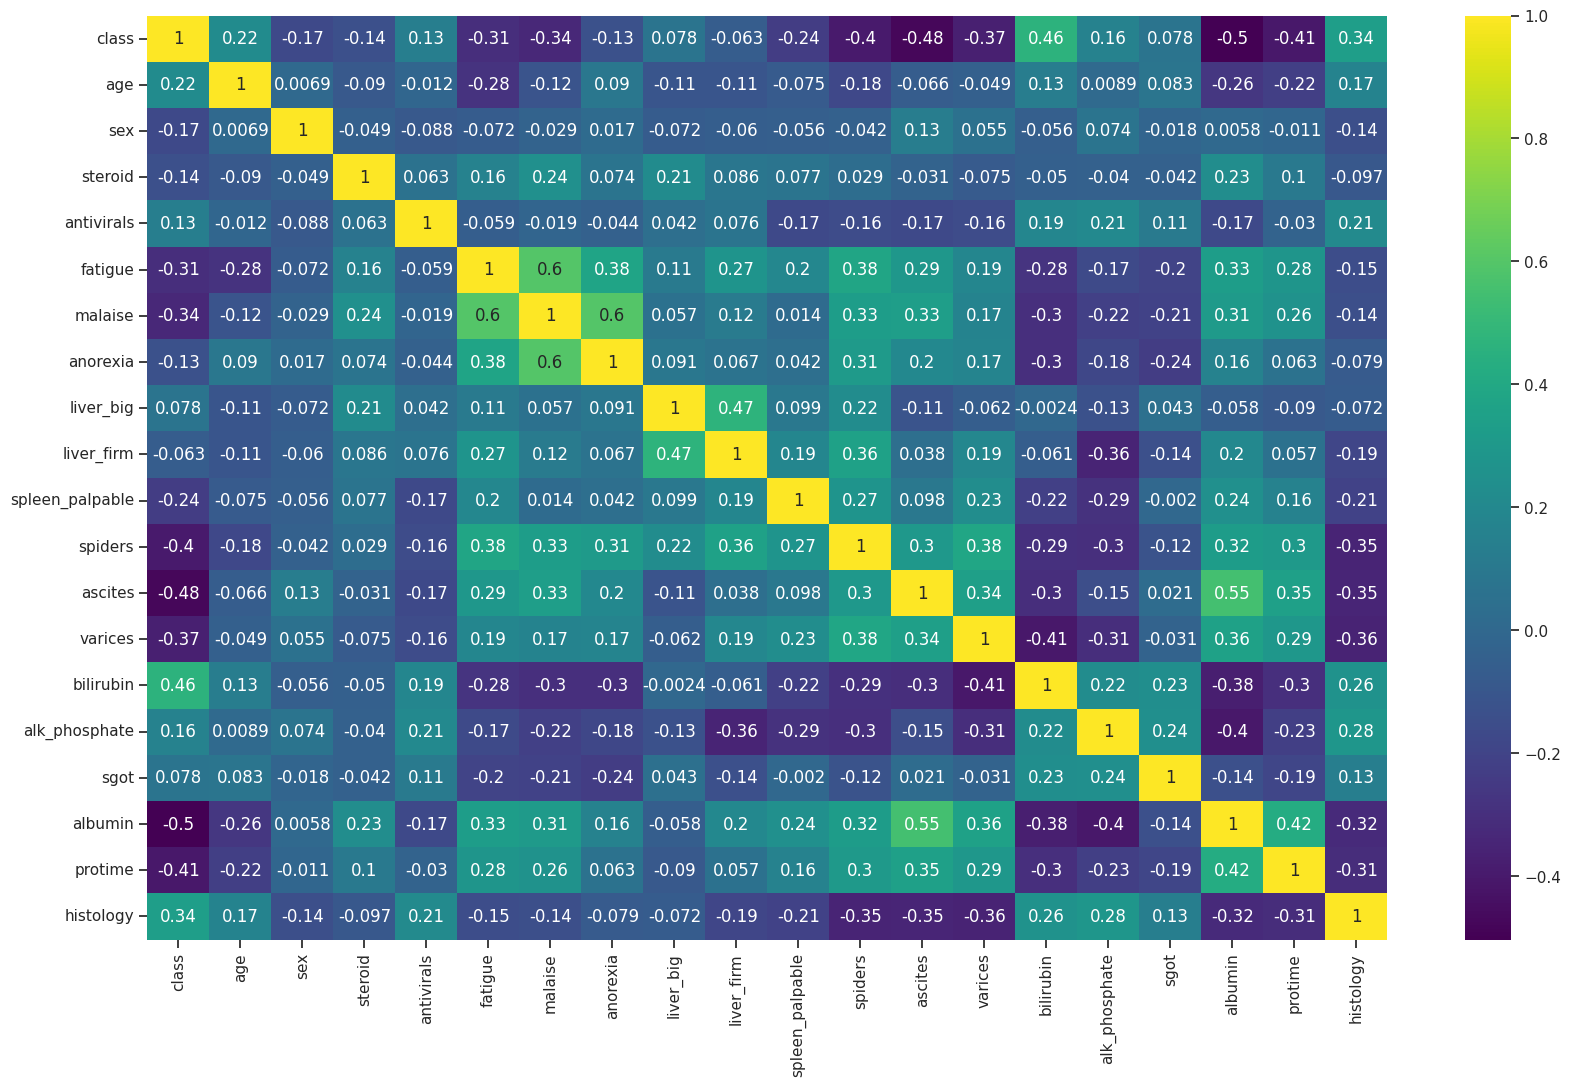

In [ ]:
sns.set(style = "ticks")
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

### Distribution (Histogram)

In [ ]:
features = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class']
rows = 4
cols = 5
fig = make_subplots(rows=rows, cols=cols, subplot_titles=features)
x, y = np.meshgrid(np.arange(rows)+1, np.arange(cols)+1)
count  = 0
for row, col in zip(x.T.reshape(-1), y.T.reshape(-1)):
    fig.add_trace(
        go.Histogram(x = df[features[count]].values),
        row = row,
        col = col
    )
    count+=1

fig.update_layout(height=900, width=900, title_text='Feature Distribution', showlegend=False)
fig.show()

In [ ]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,154.000000,154.000000,154.000000,153.000000,154.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,154.000000
mean,0.207792,41.246753,1.103896,1.509804,1.844156,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.454545
std,0.407051,12.593344,0.306121,0.501546,0.363891,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499554
min,0.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,0.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,0.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,0.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,1.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


#### Age

<Figure size 2000x1000 with 0 Axes>

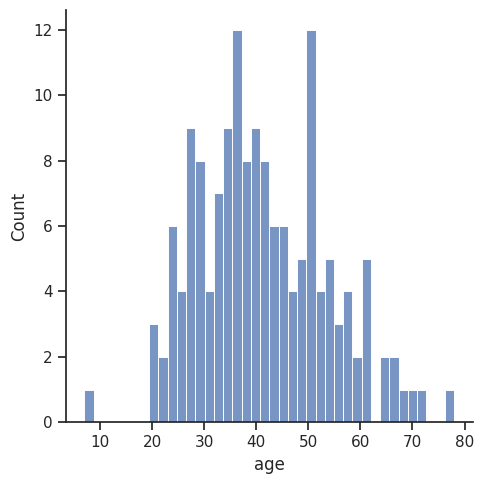

In [ ]:
plt.figure(figsize=(20, 10))
sns.displot(df.age, bins=40)

#### albumin

<Figure size 2000x1000 with 0 Axes>

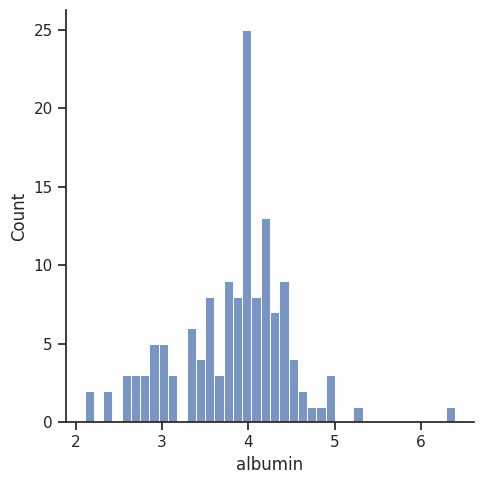

In [ ]:
plt.figure(figsize=(20, 10))
sns.displot(df.albumin, bins=40)

#### alk phosphate

<Figure size 2000x1000 with 0 Axes>

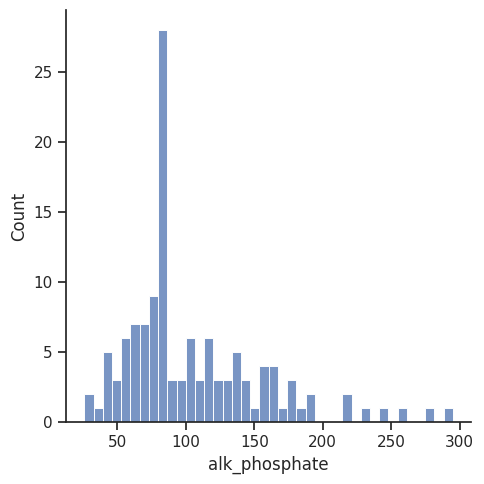

In [ ]:
plt.figure(figsize=(20, 10))
sns.displot(df["alk_phosphate"], bins=40)

#### Bilirubin

<Figure size 2000x1000 with 0 Axes>

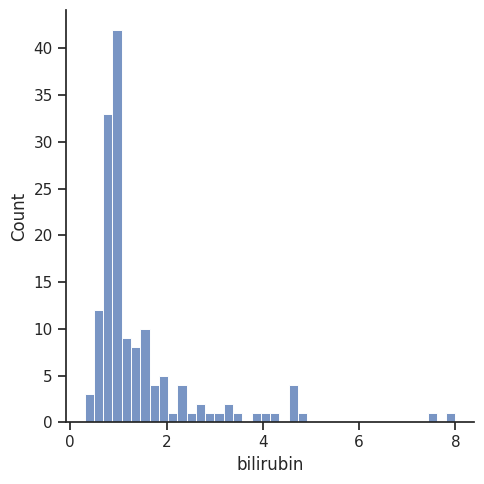

In [ ]:
plt.figure(figsize=(20, 10))
sns.displot(df.bilirubin, bins=40)

#### Protime

<Figure size 2000x1000 with 0 Axes>

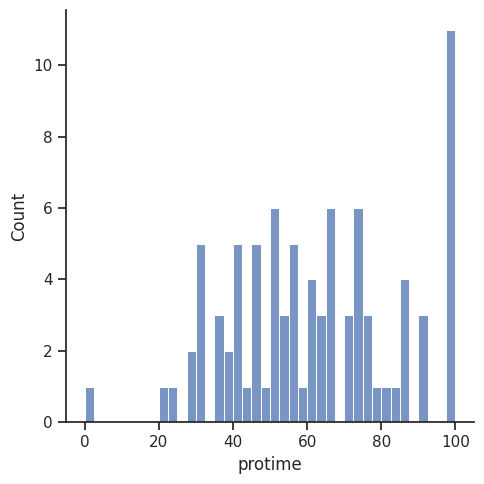

In [ ]:
plt.figure(figsize=(20, 10))
sns.displot(df.protime, bins=40)

#### sgot

<Figure size 2000x1000 with 0 Axes>

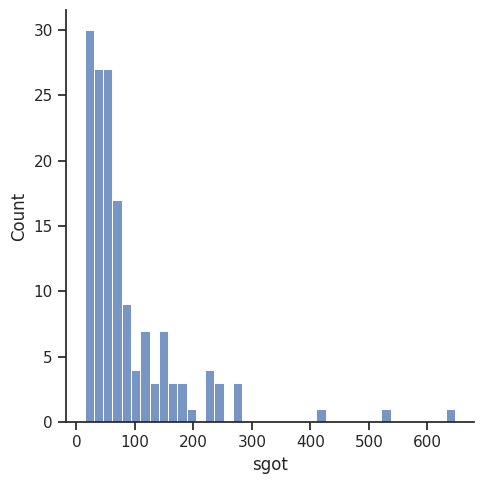

In [ ]:
plt.figure(figsize=(20, 10))
sns.displot(df.sgot, bins=40)

### Boxplot (6)

#### Overview

#### Boxplot w/ corr

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

box_cols = ['age', 'albumin', 'alk_phosphate', 'bilirubin', 'protime', 'sgot']

# Compute correlations and create subplot titles
subplot_titles = []
for col in box_cols:
    try:
        corr = df['class'].corr(df[col])
        subplot_titles.append(f"{col} (corr={corr:.2f})")
    except Exception as e:
        print(f"Error calculating correlation between class and {col}: {e}")

# Define rows and columns for subplots
rows = 2
cols = 3

# Create subplots
fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles)

# Create meshgrid for subplot positions
x, y = np.meshgrid(np.arange(rows), np.arange(cols))
count = 0

# Add boxplots to subplots
for row, col in zip(x.reshape(-1), y.reshape(-1)):
    if count >= len(box_cols):
        break
    fig.add_trace(
        go.Box(x=df[box_cols[count]], name=''),
        row=row + 1,
        col=col + 1
    )
    count += 1

# Update layout and show the plot
fig.update_layout(height=600, width=900, title_text='Boxplot Distribution', showlegend=False)
fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

pie_cols = ['class', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
            'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
            'ascites', 'varices', 'histology']

rows = 3
cols = 5

# Calculate correlation values
target_col = 'class'
corr_values = df[pie_cols].corr()[target_col]

# Sort the columns by their absolute correlation values
sorted_cols = [x for _, x in sorted(zip(np.abs(corr_values), pie_cols), reverse=True)]

# Append correlation value to each column title
subplot_titles = [f"{col} ({corr_values[col]:.2f})" for col in sorted_cols]

specs = [[{'type':'domain'} for i in range(cols)] for j in range(rows)]
fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles, specs=specs)

x, y = np.meshgrid(np.arange(1, rows+1), np.arange(1, cols+1))
count = 0

for row, col in zip(x.reshape(-1), y.reshape(-1)):
    if count >= len(sorted_cols):
        break
    labels, values = zip(*df[sorted_cols[count]].value_counts().items())
    fig.add_trace(
        go.Pie(labels=labels, values=values, name=''),
        row=row,
        col=col
    )
    count += 1

fig.update_layout(height=600, width=1000, title_text='Box Charts', showlegend=False)
fig.show()

In [ ]:
box_cols = ['age', 'albumin', 'alk_phosphate', 'bilirubin', 'protime', 'sgot']

for col in box_cols:
    try:
        corr = df['class'].corr(df[col])
        print(f"Correlation between class and {col} is {corr}")
    except Exception as e:
        print(f"Error calculating correlation between class and {col}: {e}")


Correlation between class and age is 0.21816173420690257
Correlation between class and albumin is -0.5032723533484963
Correlation between class and alk_phosphate is 0.16120350198567956
Correlation between class and bilirubin is 0.46375243644516007
Correlation between class and protime is -0.4091599025345795
Correlation between class and sgot is 0.07767780552543564


#### Detail

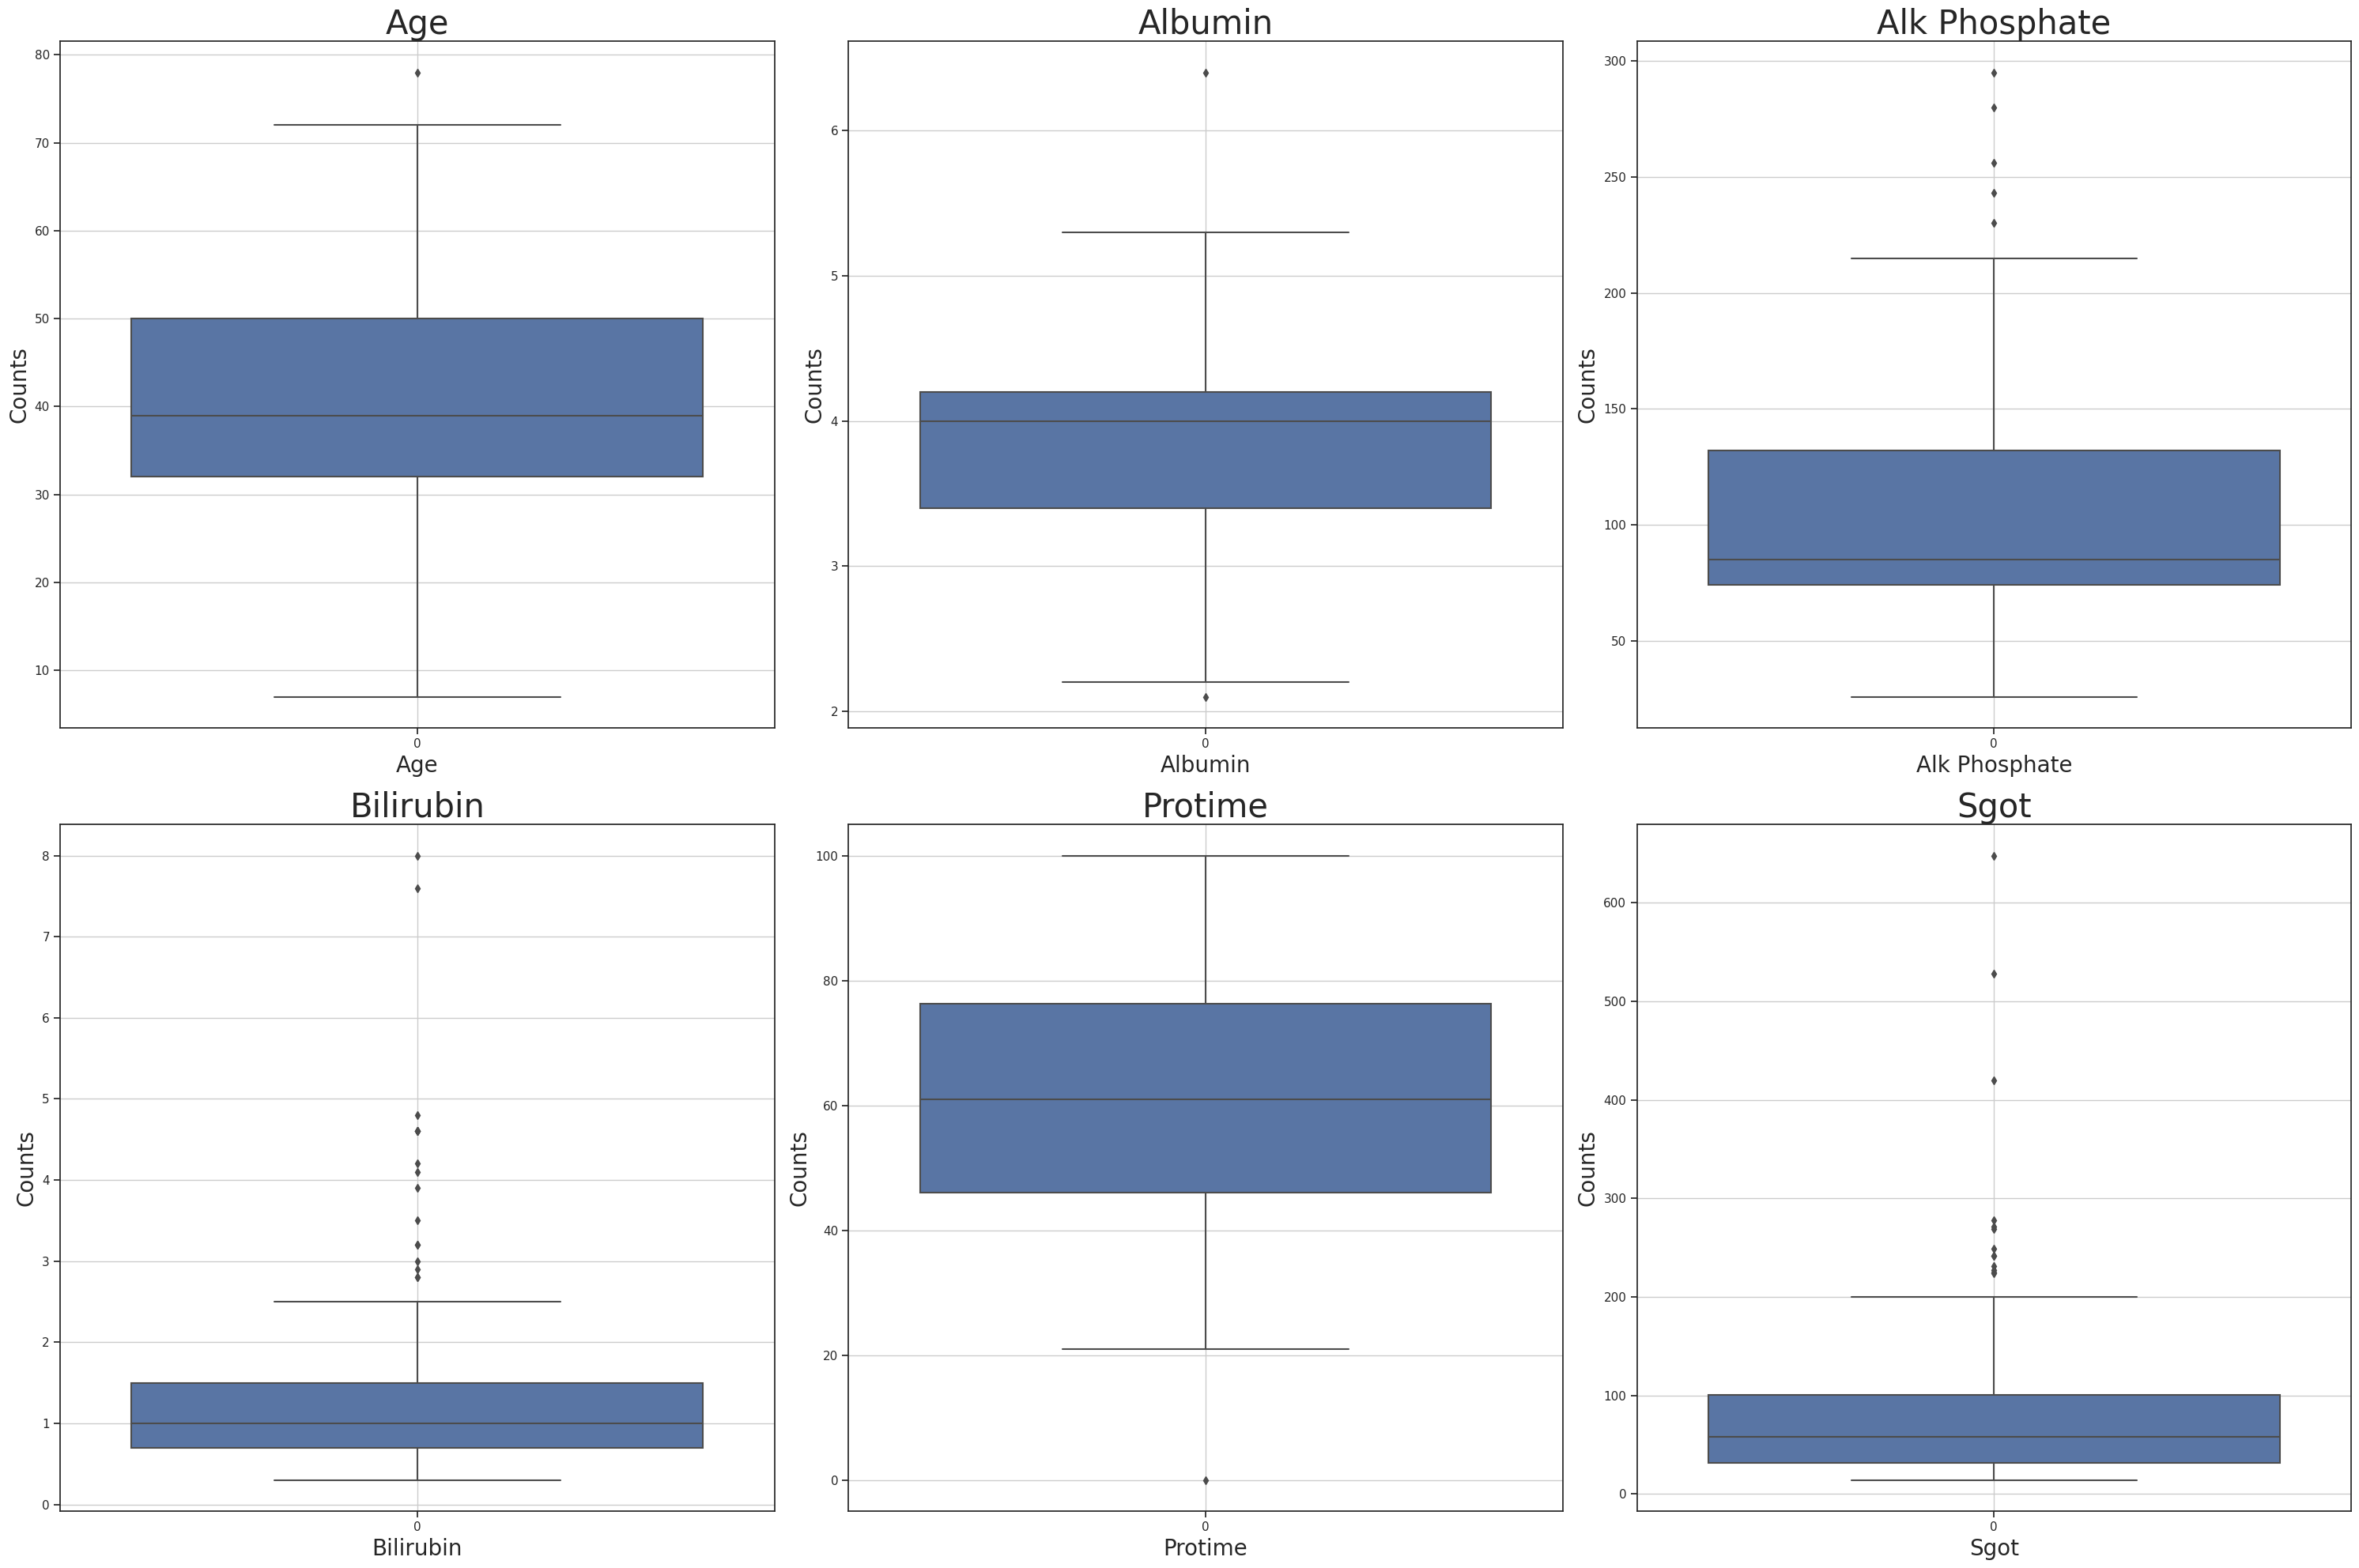

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(30, 20))

sns.boxplot(df.age, ax=axs[0, 0])
axs[0, 0].set_title('Age', fontsize=30)
axs[0, 0].set_xlabel('Age', fontsize=20)
axs[0, 0].set_ylabel('Counts', fontsize=20)
axs[0, 0].grid(True)

sns.boxplot(df.albumin, ax=axs[0, 1])
axs[0, 1].set_title('Albumin', fontsize=30)
axs[0, 1].set_xlabel('Albumin', fontsize=20)
axs[0, 1].set_ylabel('Counts', fontsize=20)
axs[0, 1].grid(True)

sns.boxplot(df.alk_phosphate, ax=axs[0, 2])
axs[0, 2].set_title('Alk Phosphate', fontsize=30)
axs[0, 2].set_xlabel('Alk Phosphate', fontsize=20)
axs[0, 2].set_ylabel('Counts', fontsize=20)
axs[0, 2].grid(True)

sns.boxplot(df.bilirubin, ax=axs[1, 0])
axs[1, 0].set_title('Bilirubin', fontsize=30)
axs[1, 0].set_xlabel('Bilirubin', fontsize=20)
axs[1, 0].set_ylabel('Counts', fontsize=20)
axs[1, 0].grid(True)

sns.boxplot(df.protime, ax=axs[1, 1])
axs[1, 1].set_title('Protime', fontsize=30)
axs[1, 1].set_xlabel('Protime', fontsize=20)
axs[1, 1].set_ylabel('Counts', fontsize=20)
axs[1, 1].grid(True)

sns.boxplot(df.sgot, ax=axs[1, 2])
axs[1, 2].set_title('Sgot', fontsize=30)
axs[1, 2].set_xlabel('Sgot', fontsize=20)
axs[1, 2].set_ylabel('Counts', fontsize=20)
axs[1, 2].grid(True)

plt.tight_layout()
plt.show()


### Pie (13)

#### Pies

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

pie_cols = ['class', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
            'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
            'ascites', 'varices', 'histology']

rows = 3
cols = 5

specs = [[{'type':'domain'} for i in range(cols)] for j in range(rows)]

fig = make_subplots(rows=rows, cols=cols, subplot_titles=pie_cols, specs=specs)
x, y = np.meshgrid(np.arange(1, rows+1), np.arange(1, cols+1))
count = 0

for row, col in zip(x.reshape(-1), y.reshape(-1)):
    if count >= len(pie_cols):
        break
    labels, values = zip(*df[pie_cols[count]].value_counts().items())
    fig.add_trace(
        go.Pie(labels=labels, values=values, name=''),
        row=row,
        col=col
    )
    count += 1

fig.update_layout(height=600, width=900, title_text='Pie Charts', showlegend=False)
fig.show()

# for col in pie_cols:
#     print(f"{col} percentages:")
#     print(df[col].value_counts(normalize=True) * 100)
#     print("\n")


#### Pies w/ Corr

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

pie_cols = ['class', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
            'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
            'ascites', 'varices', 'histology']

rows = 3
cols = 5

# Calculate correlation values
target_col = 'class'
corr_values = df[pie_cols].corr()[target_col]

# Sort the columns by their absolute correlation values
sorted_cols = [x for _, x in sorted(zip(np.abs(corr_values), pie_cols), reverse=True)]

# Append correlation value to each column title
subplot_titles = [f"{col} ({corr_values[col]:.2f})" for col in sorted_cols]

specs = [[{'type':'domain'} for i in range(cols)] for j in range(rows)]
fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles, specs=specs)

x, y = np.meshgrid(np.arange(1, rows+1), np.arange(1, cols+1))
count = 0

for row, col in zip(x.reshape(-1), y.reshape(-1)):
    if count >= len(sorted_cols):
        break
    labels, values = zip(*df[sorted_cols[count]].value_counts().items())
    fig.add_trace(
        go.Pie(labels=labels, values=values, name=''),
        row=row,
        col=col
    )
    count += 1

fig.update_layout(height=600, width=1000, title_text='Pie Charts', showlegend=False)
fig.show()


# for col in sorted_cols:
#     print(f"{col} ({corr_values[col]:.2f}):")
#     print(df[col].value_counts(normalize=True) * 100)
#     print("\n")

for col in sorted_cols:
    percentages = df[col].value_counts(normalize=True) * 100
    percentages_str = ', '.join([f'{idx}: {val:.2f}%' for idx, val in percentages.items()])
    print(f"{col} ({corr_values[col]:.2f}): {percentages_str}\n")



class (1.00): 0: 79.22%, 1: 20.78%

ascites (-0.48): 2.0: 86.67%, 1.0: 13.33%

spiders (-0.40): 2.0: 66.00%, 1.0: 34.00%

varices (-0.37): 2.0: 88.00%, 1.0: 12.00%

malaise (-0.34): 2: 60.39%, 1: 39.61%

histology (0.34): 1: 54.55%, 2: 45.45%

fatigue (-0.31): 1: 64.94%, 2: 35.06%

spleen_palpable (-0.24): 2.0: 80.00%, 1.0: 20.00%

sex (-0.17): 1: 89.61%, 2: 10.39%

steroid (-0.14): 2.0: 50.98%, 1.0: 49.02%

anorexia (-0.13): 2: 79.22%, 1: 20.78%

antivirals (0.13): 2: 84.42%, 1: 15.58%

liver_big (0.08): 2.0: 82.76%, 1.0: 17.24%

liver_firm (-0.06): 2.0: 58.33%, 1.0: 41.67%



### Histograms (1+13)

#### Overview

In [ ]:
box_cols = ['age', 'albumin', 'alk_phosphate', 'bilirubin', 'protime', 'sgot']

rows = 2
cols = 3
fig = make_subplots(rows=rows, cols=cols, subplot_titles=box_cols)
x, y = np.meshgrid(range(rows), range(cols))
count = 0
bins = 50

for row, col in zip(x.reshape(-1), y.reshape(-1)):
    if count >= len(box_cols):
        break
    try:
        fig.add_trace(
            go.Histogram(x=df[box_cols[count]], name='', nbinsx=bins),
            row=row + 1,
            col=col + 1
        )
        count += 1
    except:
        break

fig.update_layout(height=600, width=900, title_text='Histogram Distribution', showlegend=False)
fig.show()


#### Detail

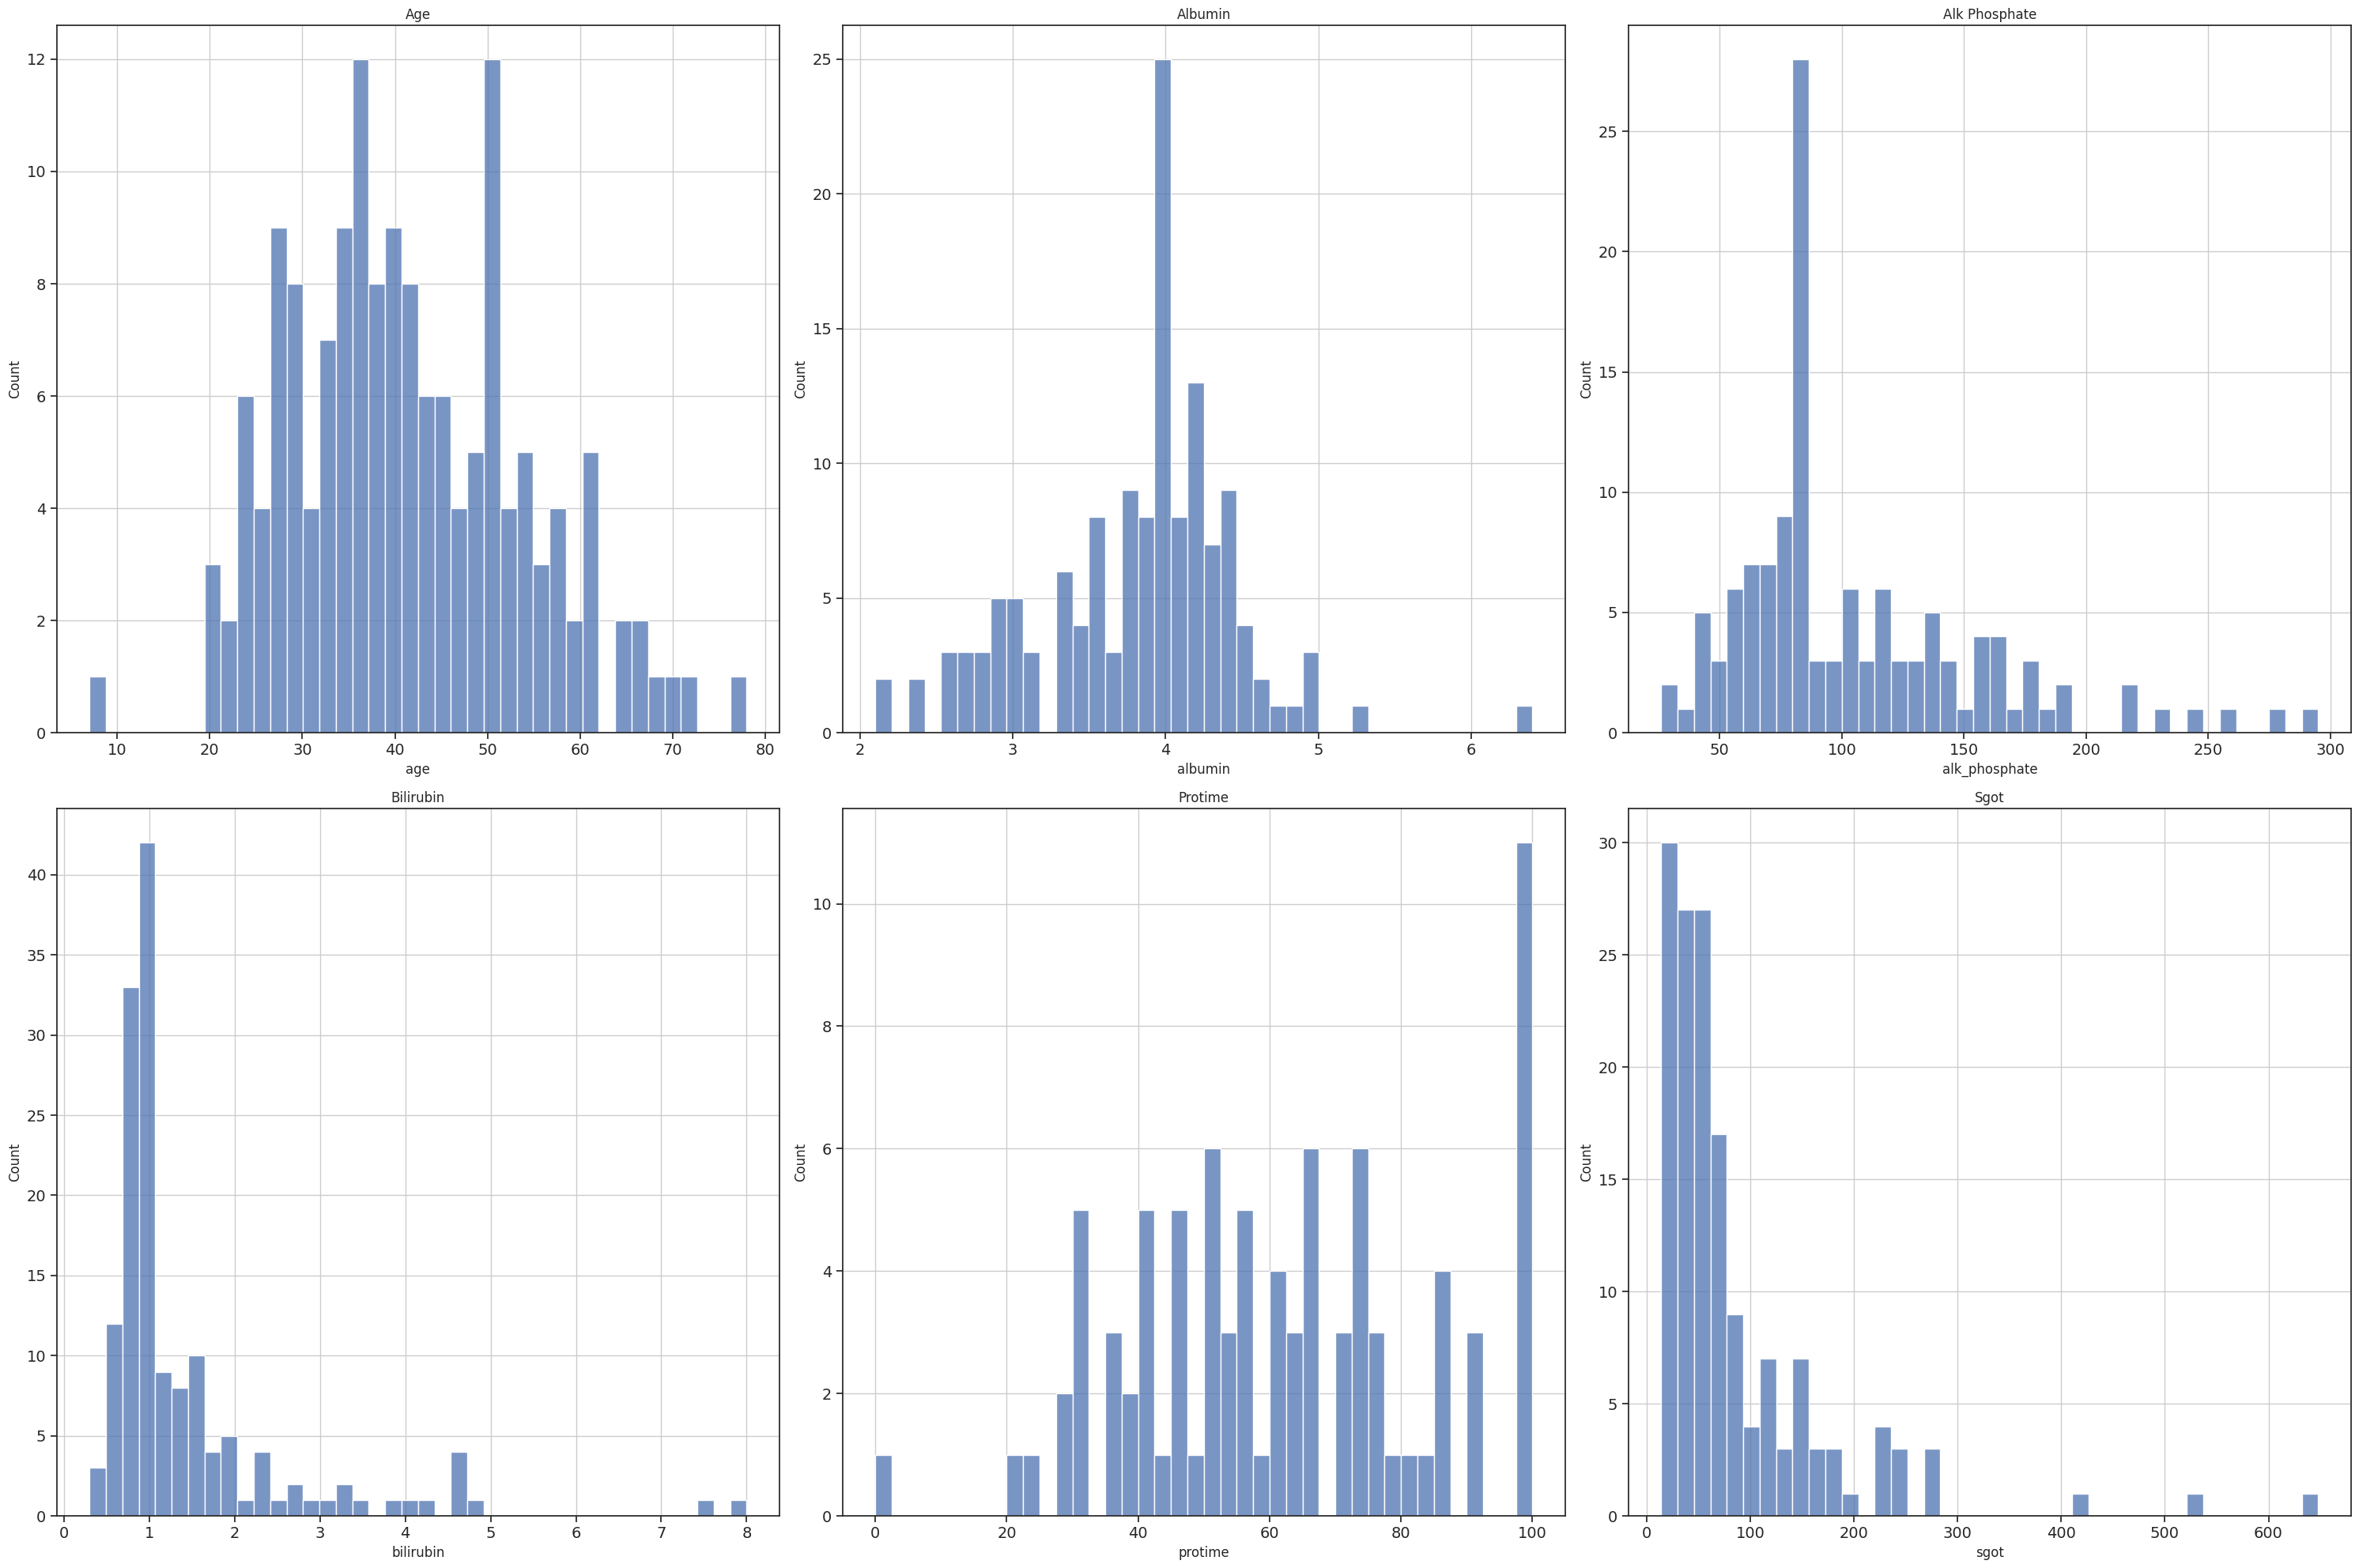

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(30, 20))

sns.histplot(df.age, bins=40, ax=axs[0, 0])
axs[0, 0].set_title('Age')
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='both', which='major', labelsize=14)

sns.histplot(df.albumin, bins=40, ax=axs[0, 1])
axs[0, 1].set_title('Albumin')
axs[0, 1].grid(True)
axs[0, 1].tick_params(axis='both', which='major', labelsize=14)

sns.histplot(df["alk_phosphate"], bins=40, ax=axs[0, 2])
axs[0, 2].set_title('Alk Phosphate')
axs[0, 2].grid(True)
axs[0, 2].tick_params(axis='both', which='major', labelsize=14)

sns.histplot(df.bilirubin, bins=40, ax=axs[1, 0])
axs[1, 0].set_title('Bilirubin')
axs[1, 0].grid(True)
axs[1, 0].tick_params(axis='both', which='major', labelsize=14)

sns.histplot(df.protime, bins=40, ax=axs[1, 1])
axs[1, 1].set_title('Protime')
axs[1, 1].grid(True)
axs[1, 1].tick_params(axis='both', which='major', labelsize=14)

sns.histplot(df.sgot, bins=40, ax=axs[1, 2])
axs[1, 2].set_title('Sgot')
axs[1, 2].grid(True)
axs[1, 2].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()

### Summary

| Number | Variable         | Group        | Description | Note |
|--------|------------------|--------------|-------------|------|
| 0 | `class` | Target | Diagnosis outcome | Binary (0 or 1) |
| 1 | `age` | Demographic | Patient's age | Years |
| 2 | `sex` | Demographic | Patient's sex | Binary (1 for female, 2 for male) |
| 3 | `steroid` | Treatment | Steroid medication status | Binary (1 for used, 2 for not used) |
| 4 | `antivirals` | Treatment | Antiviral medication status | Binary (1 for used, 2 for not used) |
| 5 | `fatigue` | Symptom | Presence of fatigue | Binary (1 for yes, 2 for no) |
| 6 | `malaise` | Symptom | Presence of malaise | Binary (1 for yes, 2 for no) |
| 7 | `anorexia` | Symptom | Presence of anorexia | Binary (1 for yes, 2 for no) |
| 8 | `liver big` | Physical Exam | Hepatomegaly status | Binary (1 for yes, 2 for no) |
| 9 | `liver firm` | Physical Exam | Firmness of liver | Binary (1 for yes, 2 for no) |
| 10 | `spleen palpable` | Physical Exam | Palpability of spleen | Binary (1 for yes, 2 for no) |
| 11 | `spiders` | Physical Exam | Presence of spider angiomas | Binary (1 for yes, 2 for no) |
| 12 | `ascites` | Physical Exam | Presence of ascites | Binary (1 for yes, 2 for no) |
| 13 | `varices` | Physical Exam | Presence of varices | Binary (1 for yes, 2 for no) |
| 14 | `bilirubin` | Lab Test | Bilirubin level | mg/dL |
| 15 | `alk phosphate` | Lab Test | Alkaline phosphatase level | IU/L |
| 16 | `sgot` | Lab Test | SGOT level | IU/L |
| 17 | `albumin` | Lab Test | Albumin level | g/dL |
| 18 | `protime` | Lab Test | Prothrombin time | Seconds |
| 19 | `histology` | Other | Histology test status/result | Binary (1 or 2) |


# 4.Preparation

## 4.1.Preprocessing

### 4.1.1.Label

In [ ]:
# Change label name
df = df.rename(columns={'class': 'label'})

# Split df into X and y
y = df['label']
X = df.drop('label', axis=1)

# X.columns

### 4.1.2.Partition

In [ ]:
# First, split data into train (70%) and a temporary set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, shuffle=True, stratify=y, random_state=3)

# Then split the temporary set into validation (15% of the total) and test sets (15% of the total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, shuffle=True, stratify=y_temp, random_state=3)


### 4.1.3.Pipelines

In [ ]:
# Define the transformer function to handle outliers using IQR
def handle_outliers_iqr(X):
    Q1 = np.percentile(X, 25, axis=0)
    Q3 = np.percentile(X, 75, axis=0)
    IQR = Q3 - Q1
    X_clipped = X.copy()
    X_clipped[(X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))] = np.nan
    return X_clipped

def handle_outliers_qua(X):
    X_df = pd.DataFrame(X)
    X_clipped = X_df.clip(upper=X_df.quantile(0.95), lower=X_df.quantile(0.05), axis=1)
    return X_clipped.values


# Define transformers
outlier_transformer = FunctionTransformer(handle_outliers_qua)
log_transformer = FunctionTransformer(np.log1p, validate=False)

# Get indices of columns
cols_to_transform = ['albumin', 'protime', 'sgot', 'age', 'alk_phosphate', 'bilirubin']
indices_to_transform = [X_train.columns.get_loc(col) for col in cols_to_transform]

# Define the transformation pipeline (for column-level operations)
transformation = ColumnTransformer(
    transformers=[
        ('log', log_transformer, indices_to_transform[:3]), # ['albumin', 'protime', 'sgot']
        ('passthrough', 'passthrough', indices_to_transform[3:]) # ['age', 'alk_phosphate', 'bilirubin']
    ],
    remainder=outlier_transformer
)

# Define the full preprocessing pipeline (for data-level operations)
preprocessing = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Step1: Missing value imputation
    # ('transformation', transformation),  # Step2: Apply the transformation pipeline defined above
    ('scaler', StandardScaler())  # Step3: Feature Scaling
])

# Store column names
col_names = X_train.columns

# Apply the full preprocessing pipeline on the training set
X_train_preprocessed = preprocessing.fit_transform(X_train)

# Apply the full preprocessing pipeline on the validation and test sets
X_val_preprocessed = preprocessing.transform(X_val)
X_test_preprocessed = preprocessing.transform(X_test)

# Convert back to pandas DataFrame
X_train = pd.DataFrame(X_train_preprocessed, columns=col_names)
X_val = pd.DataFrame(X_val_preprocessed, columns=col_names)
X_test = pd.DataFrame(X_test_preprocessed, columns=col_names)
print("Pre-Processing done!")

Pre-Processing done!


#### Check

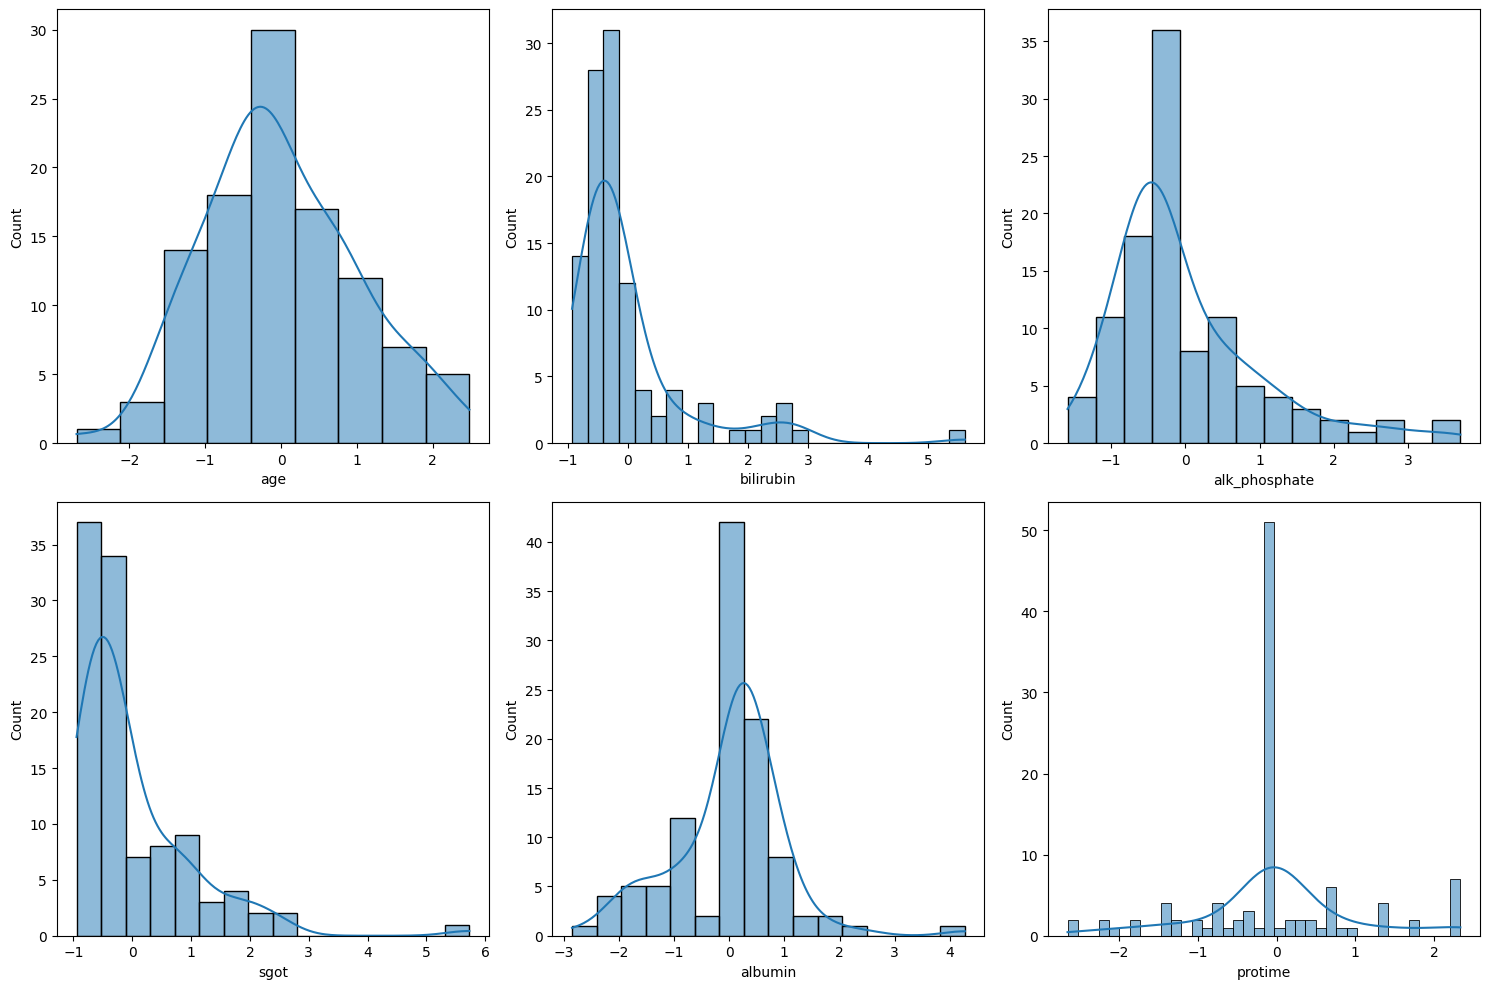

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.histplot(data=X_train, x=feature, kde=True, ax=axs[row, col])

plt.tight_layout()
plt.show()


### 4.1.4.Balancing

In [ ]:
# Create SMOTE oversampler
smote = SMOTE()

# SMOTE
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [ ]:
print(f"before:{X_train.shape}\n")
print(f"after :{X_train_balanced.shape}\n")

before:(107, 19)

after :(170, 19)



## 4.2.Feature Engineering

### 4.2.0. Correlation Matrix

                      age       sex   steroid  antivirals   fatigue   malaise  \
age              1.000000 -0.016747 -0.170339   -0.026871 -0.343321 -0.241306   
sex             -0.016747  1.000000 -0.079145    0.012667 -0.011139 -0.027693   
steroid         -0.170339 -0.079145  1.000000    0.046234  0.315440  0.438633   
antivirals      -0.026871  0.012667  0.046234    1.000000 -0.111655 -0.003445   
fatigue         -0.343321 -0.011139  0.315440   -0.111655  1.000000  0.592903   
malaise         -0.241306 -0.027693  0.438633   -0.003445  0.592903  1.000000   
anorexia         0.014659  0.019597  0.199431   -0.114136  0.358577  0.451185   
liver_big       -0.079533 -0.115355  0.109358    0.075120  0.060169 -0.004918   
liver_firm      -0.003222 -0.107515  0.002935    0.092868  0.098722 -0.055202   
spleen_palpable -0.062371 -0.039836  0.150139   -0.266251  0.329810  0.085881   
spiders         -0.193079 -0.032341  0.103617   -0.189572  0.471912  0.246615   
ascites         -0.020930  0

<Axes: >

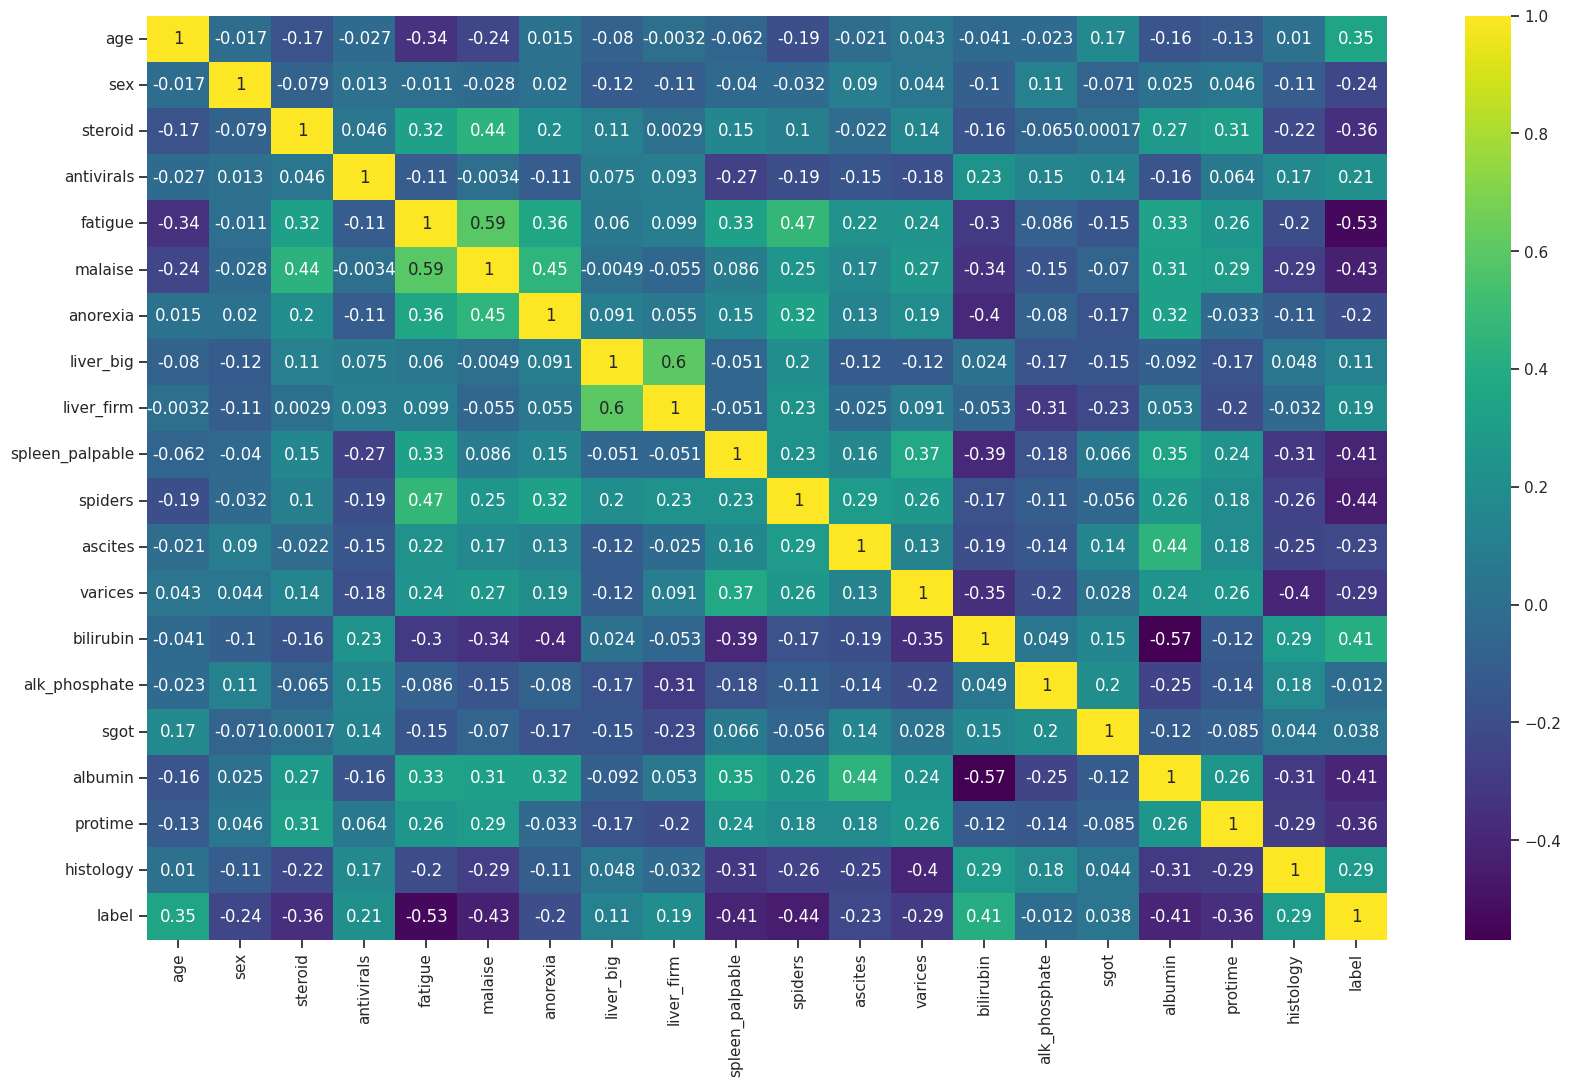

In [ ]:
# combine X_train_balanced and y_train_balanced
train_balanced = pd.concat([X_train_balanced, y_train_balanced], axis=1)

# compute correlation matrix
correlation_matrix = train_balanced.corr()

print(correlation_matrix)

sns.set(style = "ticks")
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

### 4.2.1.Feature selection

In [ ]:
# # Features to keep based oncorrelation (>0.3)
# features_to_keep = ['albumin','ascites','bilirubin','protime','spiders',
#                     'varices','malaise','histology','fatigue']

# # # Features to drop based oncorrelation (>0.1)
# # features_to_keep = ['albumin','ascites','bilirubin','protime','spiders',
# #                     'varices','malaise','histology','fatigue','spleen_palpable',
# #                     'age','sex','alk_phosphate','steroid','anorexia','antivirals']


# # Keep only the features in the list
# X_train_balanced = X_train_balanced[features_to_keep]
# X_val = X_val[features_to_keep]
# X_test = X_test[features_to_keep]


### 4.2.2.PCA

In [ ]:
def apply_pca(X_train, X_val, X_test):
    # Define PCA
    pca = PCA(0.7)

    # Fit PCA on the training data
    pca.fit(X_train)

    # Transform the data
    X_train = pca.transform(X_train)
    X_val = pca.transform(X_val)
    X_test = pca.transform(X_test)

    return X_train, X_val, X_test

X_train_balanced, X_val, X_test = apply_pca(X_train_balanced, X_val, X_test)


In [ ]:
X_train_balanced.shape

(170, 8)

### 4.2.5.Deep Copy

In [ ]:
# Deep Copy
X_train_balanced_copy = deepcopy(X_train_balanced)
y_train_balanced_copy = deepcopy(y_train_balanced)
X_val_copy = deepcopy(X_val)
y_val_copy = deepcopy(y_val)
X_test_copy = deepcopy(X_test)
y_test_copy = deepcopy(y_test)

# 5.Classification

## 5.1.Classic Models

### 5.1.1.Tuning-Acc

#### 5.1.1.1.Optimization-Acc

In [ ]:
# Ignore warnings
warnings.filterwarnings('ignore')

# Define the models and parameters
models = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.1, 1, 10], # smaller values specify stronger regularization
            "penalty": ['l1', 'l2'] # regularization term
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 200], # number of trees in the forest
            "max_depth": [None, 10, 20], # maximum depth of the tree
            "min_samples_split": [2, 5, 10] # minimum number of samples required to split an internal node
        }
    },

    "Support Vector Machine": {
        "model": SVC(probability=True),
        "params": {
            "C": [0.1, 1, 10], # Increasing C(less regu.), decreasing lambda (less regu.)
            "kernel": ['linear', 'rbf'] # Radial Basis Function, non-linear
        }
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": range(1, 20), # number of neighbors
        }
    },
    "Gradient Boosting Classifier": {
        "model": GradientBoostingClassifier(),
        "params": {
            "n_estimators": [50, 100, 200], # number of boosting stages to perform.
                                            # GB is robust to o.fitting, larger nb-better perform
            "learning_rate": [0.01, 0.1, 1],# LR shrinks the contribution of each tree by LR
            "max_depth": [3, 5, 7] # maximum depth of the individual regression estimators
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 1],
            "max_depth": [3, 5, 7] # maximum tree depth for base learners
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(),
        "params": {
            "n_estimators": [50, 100, 200], # number of boosted trees to fit
            "learning_rate": [0.01, 0.1, 1],
            "max_depth": [3, 5, 7] # maximum tree depth for base learner
        }
    },
    "Gaussian Naive Bayes": {
        "model": GaussianNB(),
        "params": {}
    }
}

# Initialize a dictionary to hold the tuned models and their best parameters
tuned_models = {}

criteria = ['accuracy', 'balanced_accuracy', 'precision',
                    'recall', 'f1', 'roc_auc', 'neg_log_loss']

# Perform grid search to find the optimal parameters
for name, model in models.items():
    print(f"Tuning {name}...")
    try:
        clf = GridSearchCV(model["model"], model["params"], cv=5, scoring=criteria[0])
        clf.fit(X_train_balanced, y_train_balanced)
        tuned_models[name] = clf
        print(f"Best parameters for {name}: {clf.best_params_}")
        print()
    except Exception as e:
        print(f"An error occurred during the tuning of {name}: {str(e)}")

print("Summary")
for model, grid_obj in tuned_models.items():
    print()
    print(f"Model: {model}")
    print(f"Best parameters: {grid_obj.best_params_}")



Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

Tuning Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 10, 'kernel': 'rbf'}

Tuning K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 1}

Tuning Gradient Boosting Classifier...
Best parameters for Gradient Boosting Classifier: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 200}

Tuning XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Tuning LightGBM...
Best parameters for LightGBM: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 100}

Tuning Gaussian Naive Bayes...
Best parameters for Gaussian Naive Bayes: {}

Summary

Model: Logistic Regression
Best parameters: {'C': 0.1, 'penalty': 'l2'}

Model: Random Forest
Best parameters: {'max_depth': 10, 'm

#### 5.1.1.2.Validation

Logistic Regression
Accuracy = 0.83, Precision = 0.57, Recall = 0.80, F1 Score = 0.67, Specificity = 0.83

Random Forest
Accuracy = 0.70, Precision = 0.33, Recall = 0.40, F1 Score = 0.36, Specificity = 0.78

Support Vector Machine
Accuracy = 0.78, Precision = 0.50, Recall = 0.40, F1 Score = 0.44, Specificity = 0.89

K-Nearest Neighbors
Accuracy = 0.83, Precision = 0.60, Recall = 0.60, F1 Score = 0.60, Specificity = 0.89

Gradient Boosting Classifier
Accuracy = 0.78, Precision = 0.50, Recall = 0.60, F1 Score = 0.55, Specificity = 0.83

XGBoost
Accuracy = 0.74, Precision = 0.43, Recall = 0.60, F1 Score = 0.50, Specificity = 0.78

LightGBM
Accuracy = 0.83, Precision = 0.57, Recall = 0.80, F1 Score = 0.67, Specificity = 0.83

Gaussian Naive Bayes
Accuracy = 0.83, Precision = 0.57, Recall = 0.80, F1 Score = 0.67, Specificity = 0.83

                              Accuracy  Precision  Recall  F1 Score  \
Logistic Regression           0.826087   0.571429     0.8  0.666667   
Random Forest     

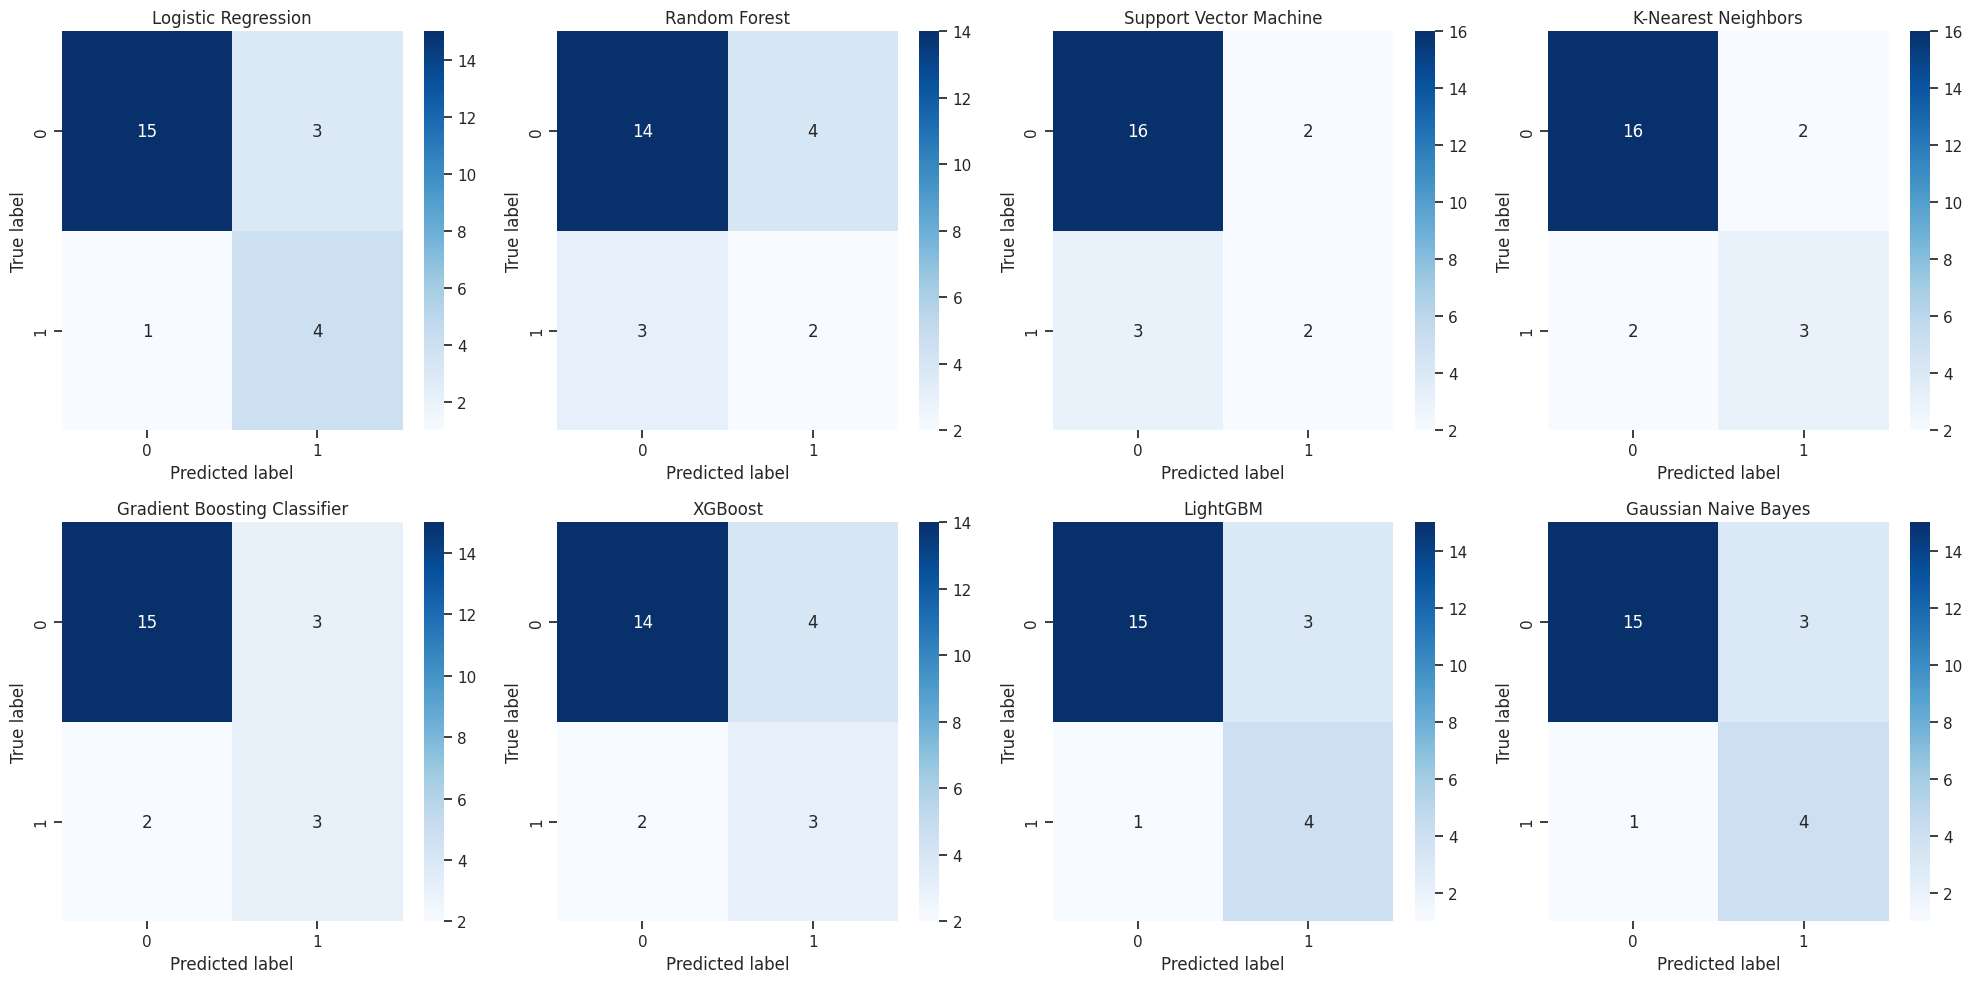

In [ ]:
# Initialize a dictionary to hold metrics
model_metrics_tuned = {}

for name, model in tuned_models.items():
    print(name)
    try:
        # Make predictions with the tuned model
        y_pred_tuned = model.predict(X_val)

        # Calculate metrics
        accuracy_tuned = accuracy_score(y_val, y_pred_tuned)
        precision_tuned = precision_score(y_val, y_pred_tuned)
        recall_tuned = recall_score(y_val, y_pred_tuned)
        f1_tuned = f1_score(y_val, y_pred_tuned)
        TN_tuned, FP_tuned, FN_tuned, TP_tuned = confusion_matrix(y_val, y_pred_tuned).ravel()
        specificity_tuned = TN_tuned / (TN_tuned+FP_tuned)

        # Store the metrics in the dictionary
        model_metrics_tuned[name] = [accuracy_tuned, precision_tuned, recall_tuned, f1_tuned, specificity_tuned]

        # Print the metrics
        print(f"Accuracy = {accuracy_tuned:.2f}, Precision = {precision_tuned:.2f}, Recall = {recall_tuned:.2f}, F1 Score = {f1_tuned:.2f}, Specificity = {specificity_tuned:.2f}\n")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Create a DataFrame from the dictionary
metrics_df_tuned = pd.DataFrame(model_metrics_tuned,
                                index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity']).T
print(metrics_df_tuned)

# Plot confusion matrices
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for (name, model), ax in zip(tuned_models.items(), axes.flatten()):
    y_pred_tuned = model.predict(X_val)
    cm_tuned = confusion_matrix(y_val, y_pred_tuned)
    sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set(title=name, xlabel='Predicted label', ylabel='True label')

plt.tight_layout()
plt.show()


| Model                        | Accuracy | Precision | Recall | F1 Score | Specificity |
|------------------------------|----------|-----------|--------|----------|-------------|
| Logistic Regression          | 0.826    | 0.571     | 0.800  | 0.667    | 0.833       |
| Random Forest                | 0.696    | 0.333     | 0.400  | 0.364    | 0.778       |
| Support Vector Machine       | 0.783    | 0.500     | 0.400  | 0.444    | 0.889       |
| K-Nearest Neighbors          | 0.826    | 0.600     | 0.600  | 0.600    | 0.889       |
| Gradient Boosting Classifier | 0.783    | 0.500     | 0.600  | 0.545    | 0.833       |
| XGBoost                      | 0.739    | 0.429     | 0.600  | 0.500    | 0.778       |
| LightGBM                     | 0.826    | 0.571     | 0.800  | 0.667    | 0.833       |
| Gaussian Naive Bayes         | 0.826    | 0.571     | 0.800  | 0.667    | 0.833       |


### 5.1.2.Prediction

Logistic Regression
Test Accuracy = 0.88, Test Precision = 0.62, Test Recall = 1.00, Test F1 Score = 0.77, Test Specificity = 0.84

Random Forest
Test Accuracy = 0.83, Test Precision = 0.60, Test Recall = 0.60, Test F1 Score = 0.60, Test Specificity = 0.89

Support Vector Machine
Test Accuracy = 0.92, Test Precision = 0.80, Test Recall = 0.80, Test F1 Score = 0.80, Test Specificity = 0.95

K-Nearest Neighbors
Test Accuracy = 0.88, Test Precision = 0.62, Test Recall = 1.00, Test F1 Score = 0.77, Test Specificity = 0.84

Gradient Boosting Classifier
Test Accuracy = 0.83, Test Precision = 0.57, Test Recall = 0.80, Test F1 Score = 0.67, Test Specificity = 0.84

XGBoost
Test Accuracy = 0.79, Test Precision = 0.50, Test Recall = 0.40, Test F1 Score = 0.44, Test Specificity = 0.89

LightGBM
Test Accuracy = 0.83, Test Precision = 0.60, Test Recall = 0.60, Test F1 Score = 0.60, Test Specificity = 0.89

Gaussian Naive Bayes
Test Accuracy = 0.83, Test Precision = 0.56, Test Recall = 1.00, Test F1

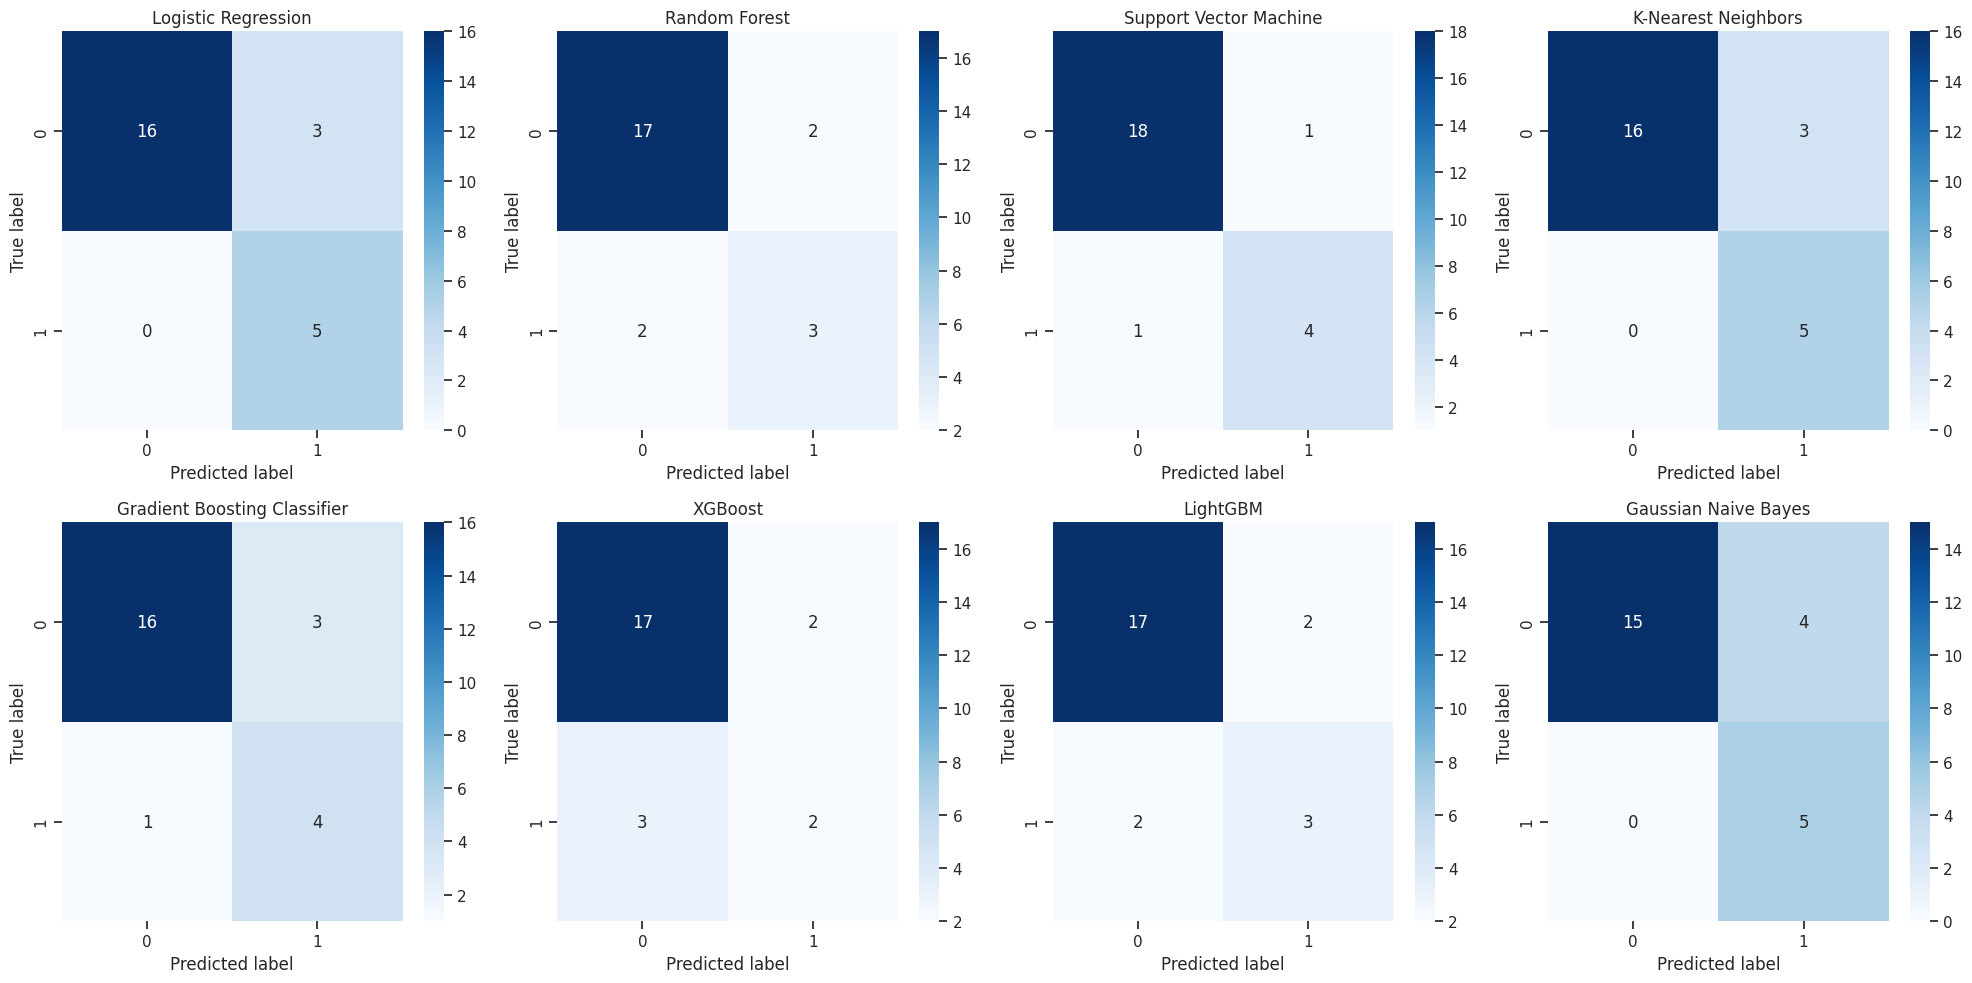

In [ ]:
# Initialize a dictionary to hold test metrics
test_metrics_tuned = {}

for name, model in tuned_models.items():
    print(name)
    try:
        # Make predictions on test data
        y_pred_test_tuned = model.predict(X_test)

        # Calculate metrics
        accuracy_test_tuned = accuracy_score(y_test, y_pred_test_tuned)
        precision_test_tuned = precision_score(y_test, y_pred_test_tuned)
        recall_test_tuned = recall_score(y_test, y_pred_test_tuned)
        f1_test_tuned = f1_score(y_test, y_pred_test_tuned)
        TN_test_tuned, FP_test_tuned, FN_test_tuned, TP_test_tuned = confusion_matrix(y_test, y_pred_test_tuned).ravel()
        specificity_test_tuned = TN_test_tuned / (TN_test_tuned+FP_test_tuned)

        # Store the metrics in the dictionary
        test_metrics_tuned[name] = [accuracy_test_tuned, precision_test_tuned, recall_test_tuned, f1_test_tuned, specificity_test_tuned]

        # Print the metrics
        print(f"Test Accuracy = {accuracy_test_tuned:.2f}, Test Precision = {precision_test_tuned:.2f}, Test Recall = {recall_test_tuned:.2f}, Test F1 Score = {f1_test_tuned:.2f}, Test Specificity = {specificity_test_tuned:.2f}\n")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Create a DataFrame from the dictionary
test_metrics_df_tuned = pd.DataFrame(test_metrics_tuned,
                                     index=['Accuracy', 'Precision', 'Recall', 'F1', 'Specificity']).T
print(test_metrics_df_tuned.round(2))
print()

# Plot confusion matrices for test set
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for (name, model), ax in zip(tuned_models.items(), axes.flatten()):
    y_pred_test_tuned = model.predict(X_test)
    cm_test_tuned = confusion_matrix(y_test, y_pred_test_tuned)
    sns.heatmap(cm_test_tuned, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set(title=name, xlabel='Predicted label', ylabel='True label')

plt.tight_layout()
plt.show()


## 5.2.DNN

### 5.2.1.Training & Validation

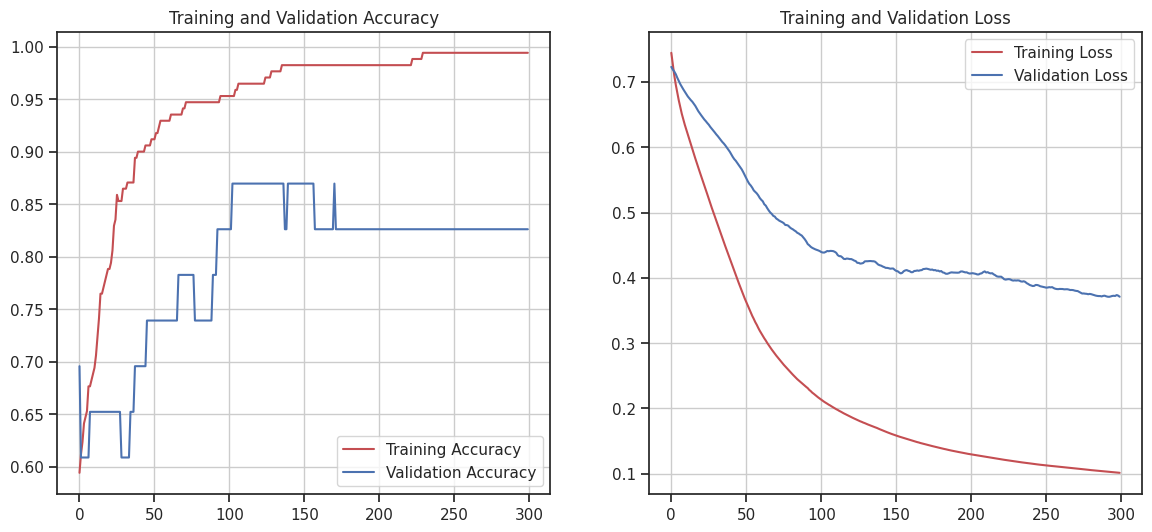

1/1 [==============================] - 0s 69ms/step
Validation Metrics:
Accuracy = 0.83, Precision = 0.60, Recall = 0.60, F1 Score = 0.60, Specificity = 0.89



In [ ]:
# Set random seeds for reproducibility
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

# Determine the number of input features
n_features = X_train_balanced_copy.shape[1]

# Define the model with L2 regularization
l2_lambda = 0.001

model = Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(l2_lambda), input_shape=(n_features,)))
# model.add(Dropout(0.5))
### Dropout for overfitting
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)))

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Set early stopping for overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=100)
### (1,100)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Fit the model
history = model.fit(X_train_balanced_copy, y_train_balanced_copy, epochs=300, batch_size=64, verbose=0,
                    validation_data=(X_val_copy, y_val_copy),
                    callbacks=[early_stopping, model_checkpoint])

# Plotting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# Plot training and validation accuracy per epoch
ax[0].plot(epochs, acc, 'r', label="Training Accuracy")
ax[0].plot(epochs, val_acc, 'b', label="Validation Accuracy")
ax[0].set_title('Training and Validation Accuracy')
ax[0].legend(loc="lower right")
ax[0].grid(True)

# Plot training and validation loss per epoch
ax[1].plot(epochs, loss, 'r', label="Training Loss")
ax[1].plot(epochs, val_loss, 'b', label="Validation Loss")
ax[1].set_title('Training and Validation Loss')
ax[1].legend(loc="upper right")
ax[1].grid(True)

plt.show()

# Load the best model
model.load_weights('best_model.h5')

# Make predictions on the validation set
y_val_pred = (model.predict(X_val_copy) > 0.5).astype("int32")

# Calculate metrics
accuracy = accuracy_score(y_val_copy, y_val_pred)
precision = precision_score(y_val_copy, y_val_pred)
recall = recall_score(y_val_copy, y_val_pred)
f1 = f1_score(y_val_copy, y_val_pred)

# Calculate specificity
cm = confusion_matrix(y_val_copy, y_val_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)

# Print metrics
print(f"Validation Metrics:\nAccuracy = {accuracy:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f}, F1 Score = {f1:.2f}, Specificity = {specificity:.2f}\n")



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 487
Trainable params: 487
Non-trainable params: 0
_________________________________________________________________


### 5.2.2.Prediction

In [ ]:
# Make predictions
y_pred = (model.predict(X_test_copy) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test_copy, y_pred)

# Compute specificity (or True Negative Rate)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)

# Calculate metrics
accuracy = accuracy_score(y_test_copy, y_pred)
precision = precision_score(y_test_copy, y_pred)
recall = recall_score(y_test_copy, y_pred)
f1 = f1_score(y_test_copy, y_pred)

# Print classification report
print(classification_report(y_test_copy, y_pred))
print()

# Print the required metrics
print(f"Deep Neural Network {accuracy:.2f}, {precision:.2f}, {recall:.2f}, {f1:.2f}, {specificity:.2f}\n")


1/1 [==============================] - 0s 24ms/step
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.67      0.80      0.73         5

    accuracy                           0.88        24
   macro avg       0.81      0.85      0.82        24
weighted avg       0.89      0.88      0.88        24


Deep Neural Network 0.88, 0.67, 0.80, 0.73, 0.89



### 5.2.3.Confusion Matrix

1/1 [==============================] - 0s 25ms/step


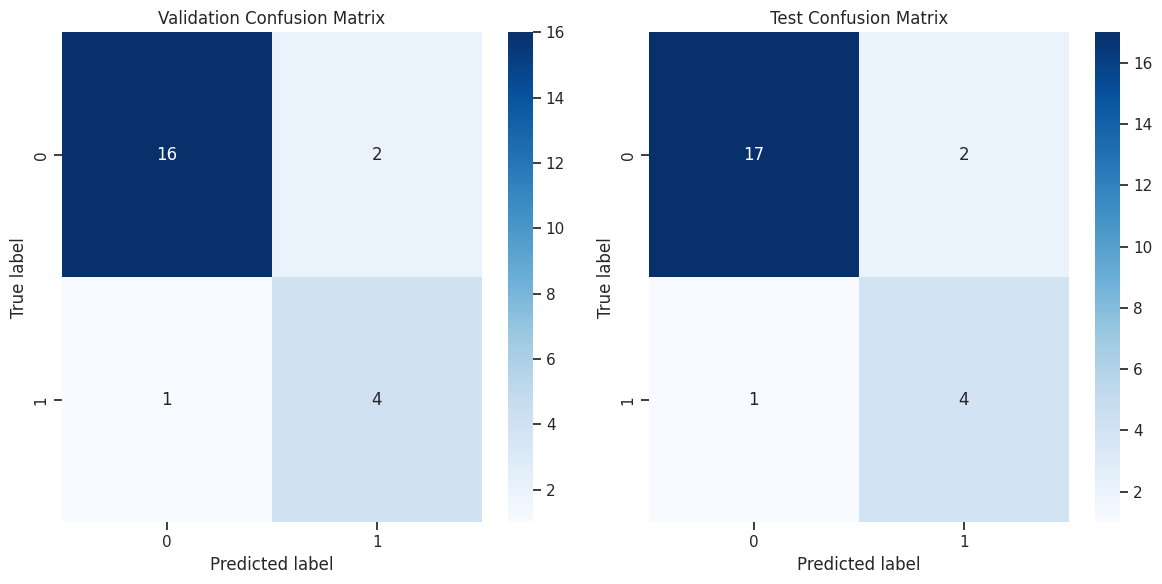

In [ ]:
# Load the saved model
model = load_model('best_model.h5')

# Make predictions on the validation set
y_val_pred_copy = (model.predict(X_val_copy) > 0.5).astype("int32")

# Make predictions on the test set
y_test_pred_copy = (model.predict(X_test_copy) > 0.5).astype("int32")

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12,6))

# Validation confusion matrix
val_confusion = confusion_matrix(y_val_copy, y_val_pred_copy)
sns.heatmap(val_confusion, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set(title="Validation Confusion Matrix", xlabel='Predicted label', ylabel='True label')

# Test confusion matrix
test_confusion = confusion_matrix(y_test_copy, y_test_pred_copy)
sns.heatmap(test_confusion, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set(title="Test Confusion Matrix", xlabel='Predicted label', ylabel='True label')

plt.tight_layout()
plt.show()


### 5.3.Report

| Model                        | Accuracy | Precision | Recall | F1   | Specificity |
| ---------------------------- | -------- | --------- | ------ | ---- | ----------- |
| Logistic Regression          | 0.88     | 0.62      | 1.0    | 0.77 | 0.84        |
| Random Forest                | 0.83     | 0.60      | 0.6    | 0.60 | 0.89        |
| Support Vector Machine       | 0.92     | 0.80      | 0.8    | 0.80 | 0.95        |
| K-Nearest Neighbors          | 0.88     | 0.62      | 1.0    | 0.77 | 0.84        |
| Gradient Boosting Classifier | 0.83     | 0.57      | 0.8    | 0.67 | 0.84        |
| XGBoost                      | 0.79     | 0.50      | 0.4    | 0.44 | 0.89        |
| LightGBM                     | 0.83     | 0.60      | 0.6    | 0.60 | 0.89        |
| Gaussian Naive Bayes         | 0.83     | 0.56      | 1.0    | 0.71 | 0.79        |
| Deep Neural Network          | 0.88     | 0.67      | 0.80   | 0.73 | 0.89        |


# Appendix